# Baseball Case Study

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Importing all required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from pandas import MultiIndex, Int64Index

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

C:\Users\2022\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\2022\AppData\Local\Temp\ipykernel_1792\4061131749.py:27: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from pandas import MultiIndex, Int64Index

In [4]:
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


With help of pandas reading the CSV file from the dataset. The dataset seems to be very small and due to the columns not being descriptive we can not understand the dataset much. So to understand the dataset really well we can take the help of wikipedia link which is given in the problem statment.
Below full name of columns are given(from wikipedia link):

W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

R – Runs scored: times reached home plate legally and safely

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

H – Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base

PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [5]:
df.columns # checking the columns of dataset

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.rename(columns={'W' : 'Wins', 'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles', '3B' : 'Triples',
                   'HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs', 'SB' : 'Stolen Base','RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average', 'CG' : 'Complete Game','SHO' : 'Shut Outs', 'SV' : 'Saves', 
                   'E' : 'Errors'},  inplace=True)

Here Renaming the columns of the datasets so that we could better understand the problem statment

In [7]:
df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Here my dataset column names are in descriptive form. Lets do EDA to understand the dataset better.

# Exploratory Data Analysis(EDA)

In [8]:
df.shape # Checking the shape of dataset

(30, 17)

Total number of rows:30  , 
Total number of columns:17

In [9]:
df.head()  # Checking head (top 5 rows) of the dataset

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.tail()  # Checking tail (bottom 5 rows) of the dataset

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [11]:
df.sample() # Checking the sample (any 1 row) of the dataset

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90


In [12]:
df.sample(3) # Checking the sample(3) (any 3 rows) of the dataset

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78


In [13]:
df.dtypes # Checking the data types of the columns

Wins                    int64
Runs Scored             int64
At Bat                  int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Base             int64
Runs Average            int64
Earned Runs             int64
Earned Run Average    float64
Complete Game           int64
Shut Outs               int64
Saves                   int64
Errors                  int64
dtype: object

All the columns have integer data types except Earned Run Average, it has float type data.Since all the columns are numerical data in nature and there are no categorical data, so no need to encode the data.

In [14]:
df.info() # Checking information of dataset (Good overview)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

From above we can see the Range Index, total number of columns, null count and data types.

16 columns are integer and 1 column is float type

RangeIndex - total 30 entries from 0 to 29

No null values present in the dataset

In [15]:
df.nunique() # Checking the number of unique values in each feature columns

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

In [16]:
# Checking the uniqueness of target variable.
df['Wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

All this are the unique values present in the target column 'Wins'.

In [17]:
# List of values in the target variable
df["Wins"].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64

In [18]:
df.isnull().sum()  # Checking null values

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

In this dataset no null values are present, So No need to convert the datatype as they are appropriate so we can skip the step of data conversion Now we can directly jumps to Visualization.

<AxesSubplot:>

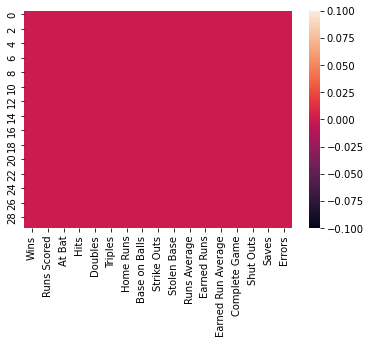

In [19]:
sns.heatmap(df.isnull()) # Visualization of null values through heatmap

From above heatmap it is clear that there is no missing values in the dataset.

# Skewness

In [20]:
df.skew() # Checking skewness of the dataset

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical. That means acceptable range is -0.5 to +0.5, here some of the features are not within the range like Runs Scored,Hits,Complete Game,Shut Outs,Saves and Errors. Further we will remove the skewness. Let's proceed...


# Summary Statistics

In [21]:
df.describe().T #Description of the dataset

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


Observations:
1. Count of all the columns is same i.e. 30. So no missing values present in the dataset.
2. In some of the columns mean is less than median(50%) Wins, Runs Scored, Doubles, Strike Outs, Runs Average, Earned Runs, Earned Run Average and Shut Outs. So all this columns are left skewed, a very "less" left skewed data columns.
3. In two columns means is equal to median Triples and Stolen Base. that means No skewness present in this two columns, and data is symmetrical.
4. In few of the columns mean is more than median At Bat, Hits, Home Runs, Base on Balls, Complete Game, Saves and Errors. So all this features are slightly right skewed.
5. There is a huge differences in max and 75% percentile(3rd quantile).

Conclusion:
From above observations we can conclude few outliers are present in the dataset and we will remove this further.

<AxesSubplot:>

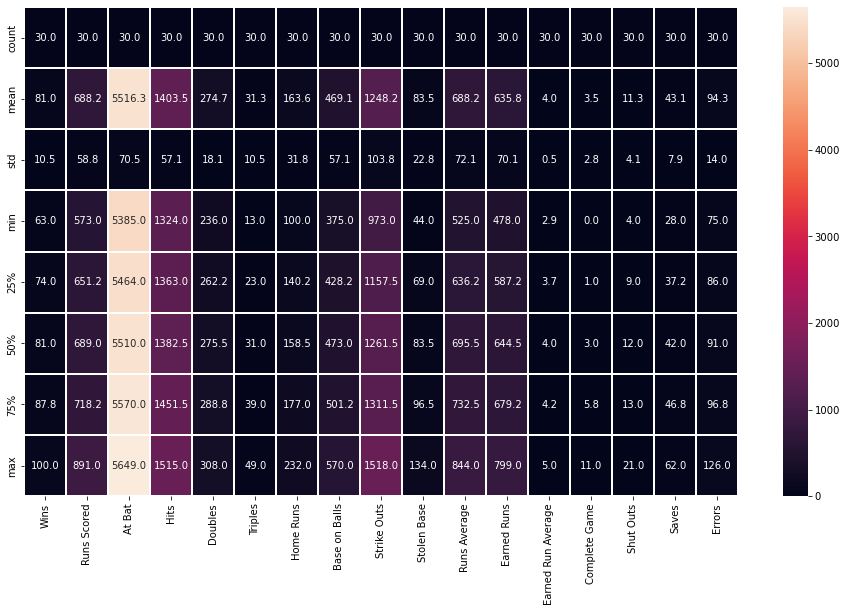

In [22]:
# Visualizing the statistics of the columns using Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)

# Data Visualization

Univariate Analysis

# Strip Plot

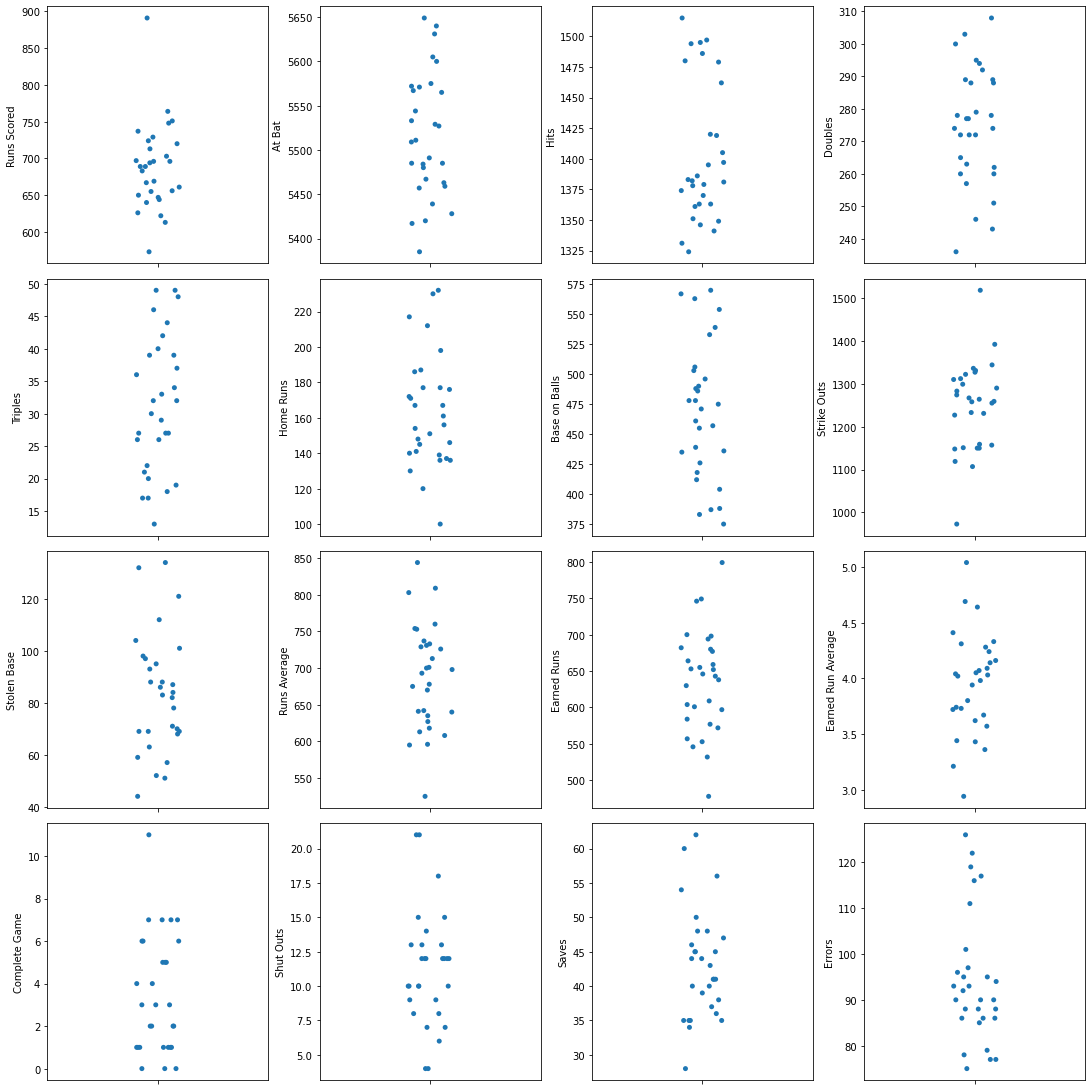

In [23]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

With the help of above strip plot we are able to see data point distribution across the data set and it's range details. 

We can see columns Runs Scored, Strike Outs, Shut Outs and Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers. We need to remove those outliers and lets check this outliers clearly in the Box Plot Visualization.

# Box Plot

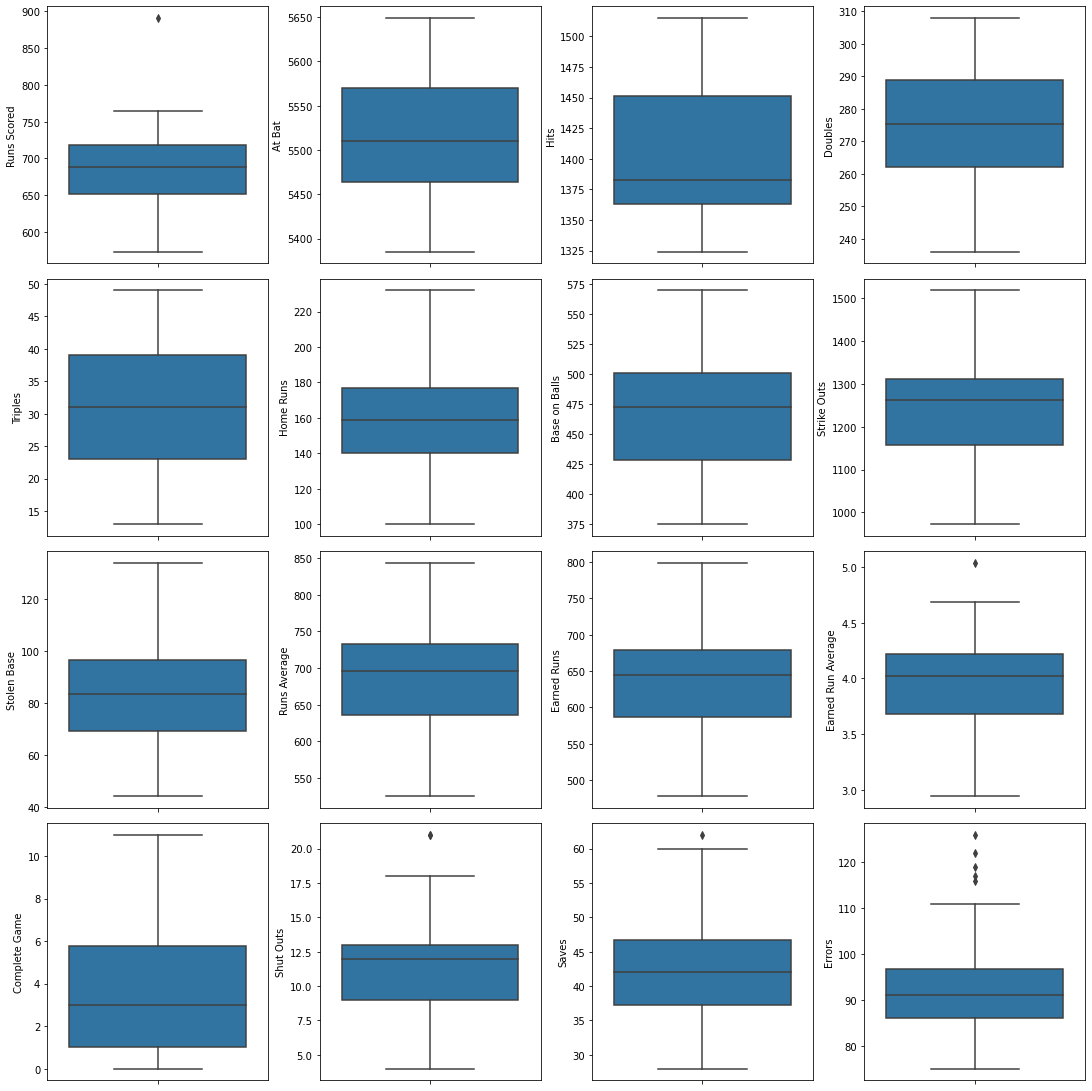

In [24]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From the above box plot representation, clearly shows few outlier points present in the feature columns Runs Scored, Earned Run Average, Shut Outs, Saves and Errors.All these will need to be treated further before building our machine learning model.

# Distribution Plot

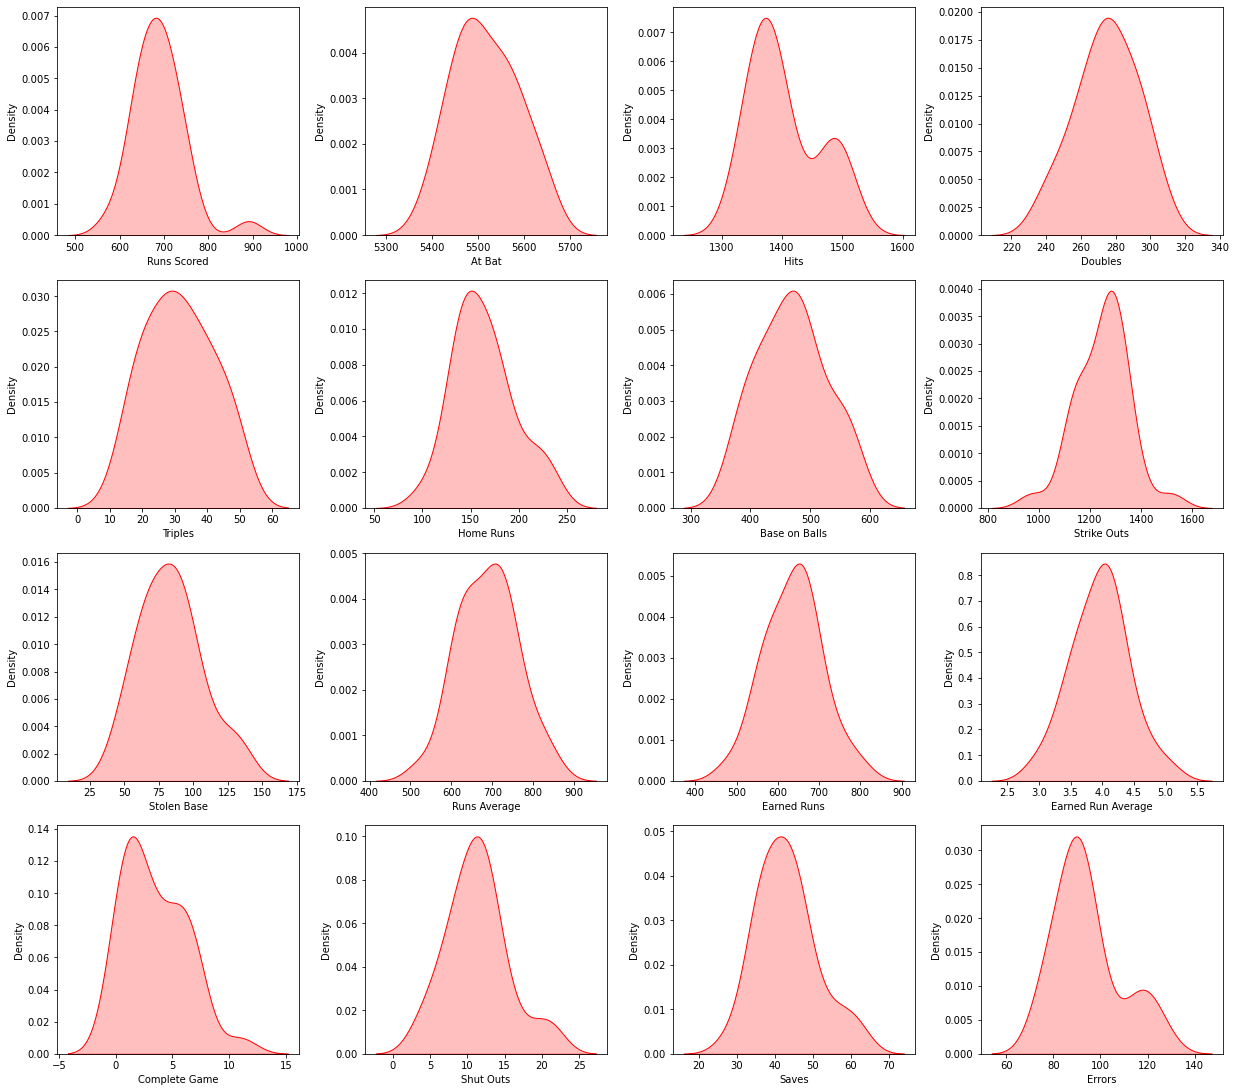

In [25]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()


From the above Distribution Plot we can see that mostly all our column data are normally distributed except for Runs Scored, Complete Game, Shut Outs and Errors columns that have slight skewness in them and will need to be treated accordingly.

Now lets check Bivariate analysis...

# Bivariate analysis

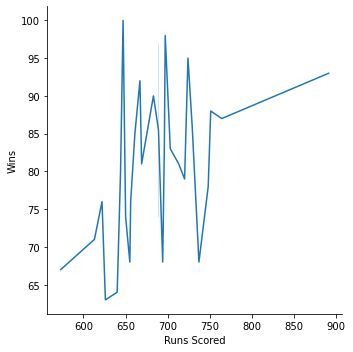

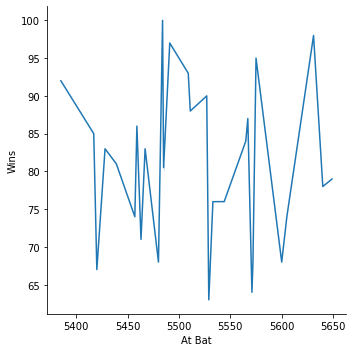

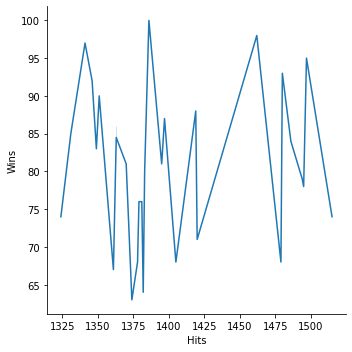

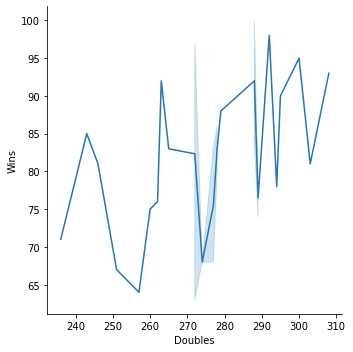

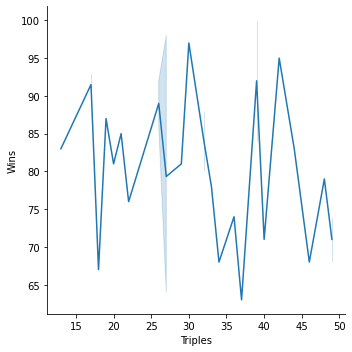

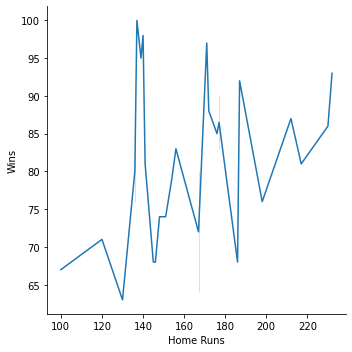

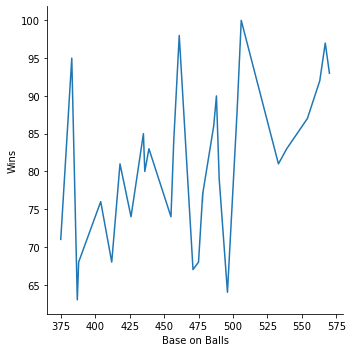

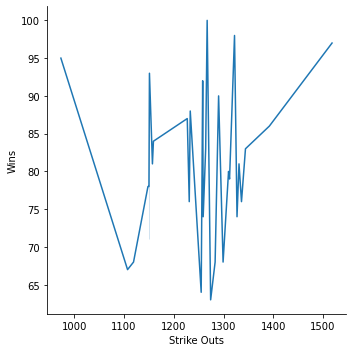

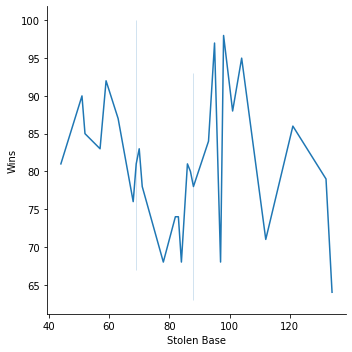

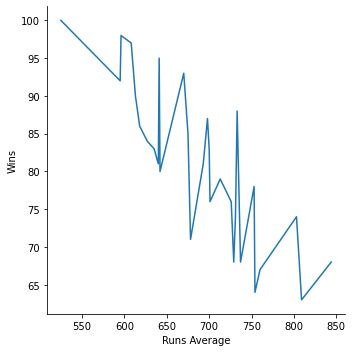

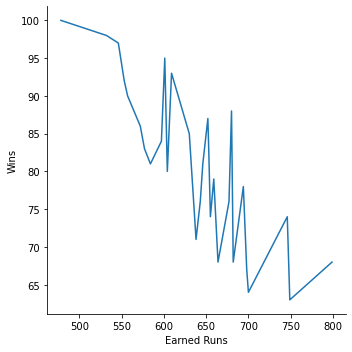

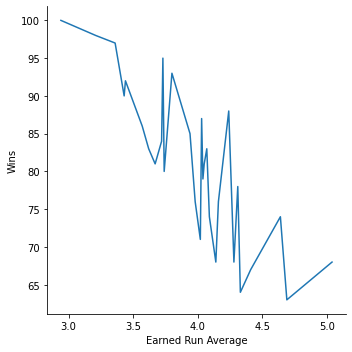

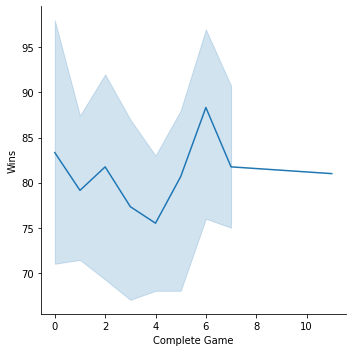

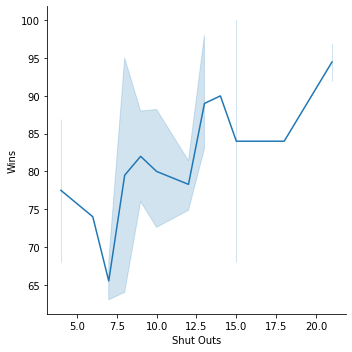

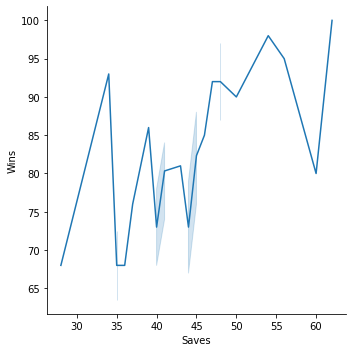

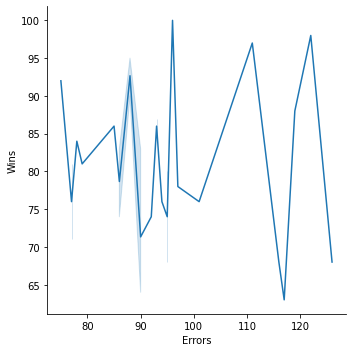

In [26]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

From the above line plots we can see that, corresponding plot to the "Wins" column shows how those feature are interrelated with the contribution on getting those particular numbers. Some of features are directly proportional while others are either inversely proportional to our label or do not have much to offer.

So we can say that the relationships between the label and all the features can be viewed from above graphs: 
1. All of the above features (except the errors) are positively correlated with our label 
2. In case the 'number of runs' increases then the chance of 'win' increases obviously 
3. In case the 'doubles' increase then the chance of 'win' increases 
4. In case the 'triples' increases then the chance of 'win' increases 
5. In case the 'home runs' increases then the chance of 'win' increases 
6. In case the 'walks on balls' increases then the chance of 'win' increases 
7. In case the 'strike outs' increases then the chance of 'win' increases for the opposite team 
8. In case the 'stolen bases' increases then the chance of 'win' increases again for the opposite team 
9. In case the 'runs allowed' increases then the chance of 'win' increases 
10. In case the 'earned run' and 'earned run average' increases the chance of 'win' increases automatically

# Bar Plot

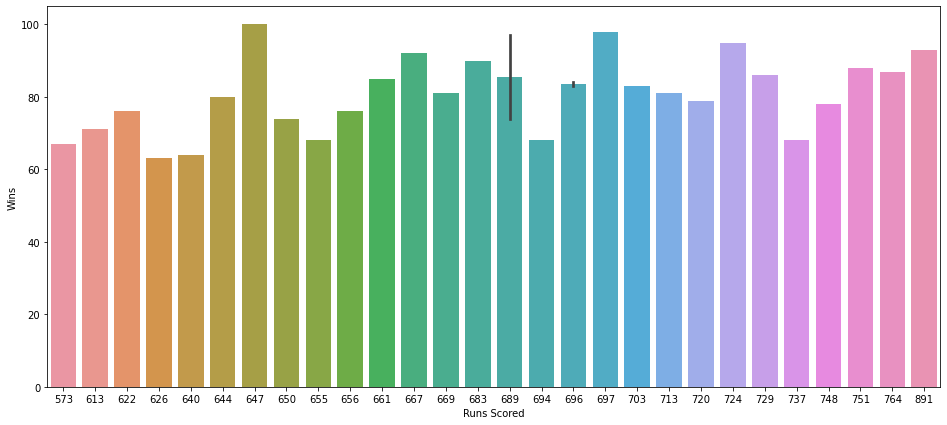

In [27]:
plt.figure(figsize=(16,7))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

Column feature "Runs Scored" and it's unique values are distributed unevenly when it comes to relating with our target/label "Wins"

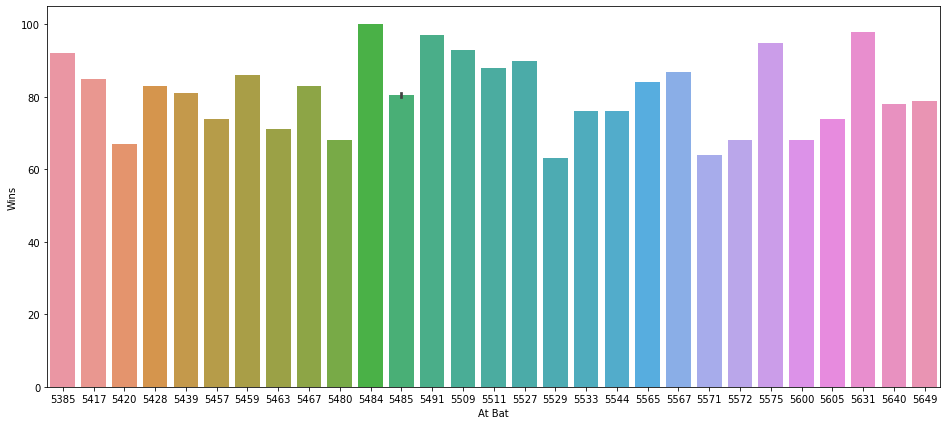

In [28]:
plt.figure(figsize=(16,7))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

Column feature "At Bat" and it's unique values are again distributed unevenly when it comes to relating with our target/label "Wins"

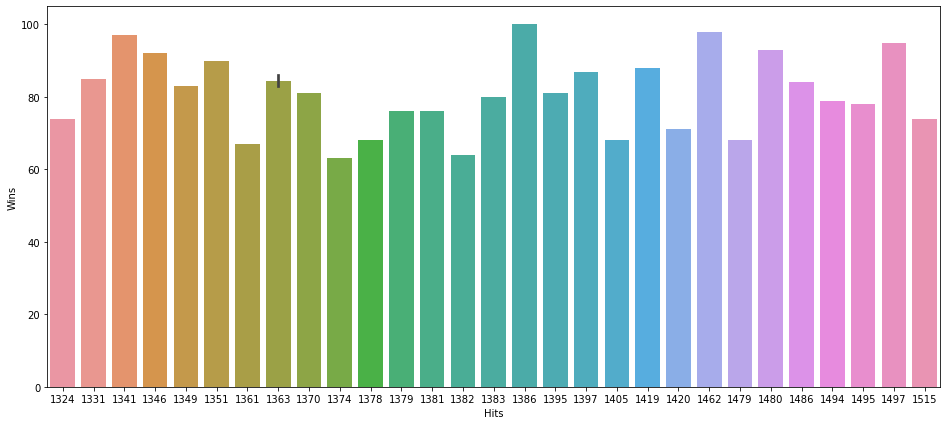

In [29]:
plt.figure(figsize=(16,7))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

Column feature "Hits" and it's unique values do not show any linear pattern when it comes to relating with our target/label "Wins"

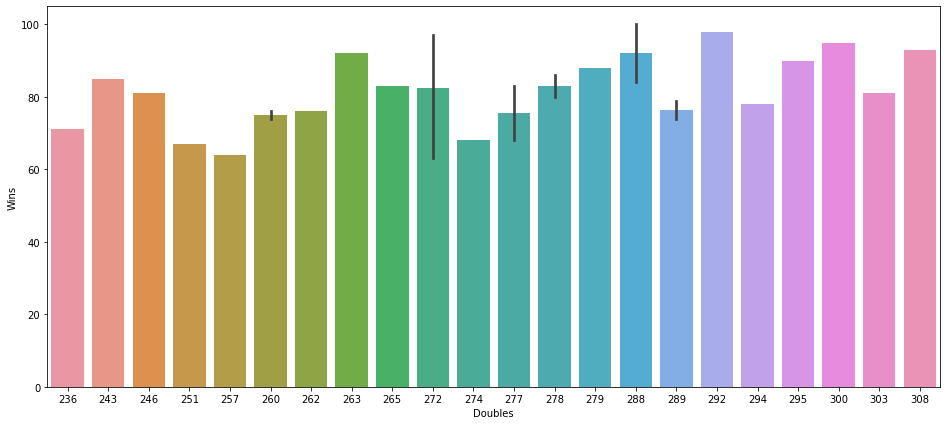

In [30]:
plt.figure(figsize=(16,7))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

Column feature "Doubles" and it's unique values again do not form any definite pattern when it comes to relating with our target/label "Wins"

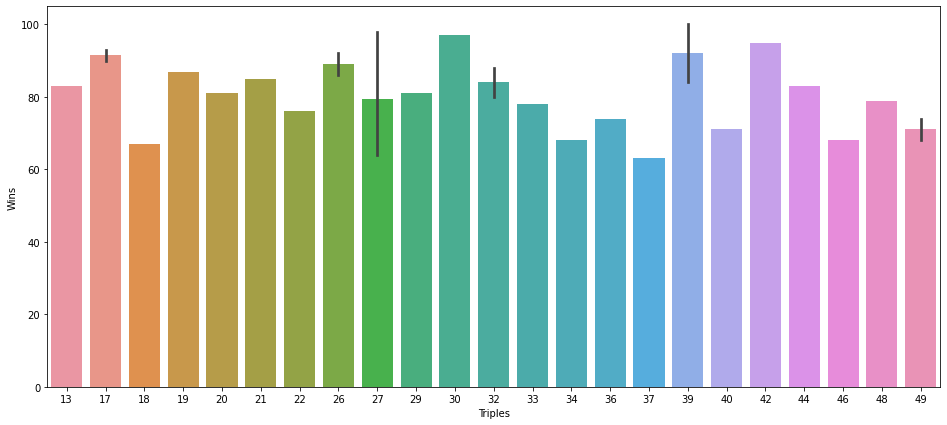

In [31]:
plt.figure(figsize=(16,7))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

Column feature "Triples" and it's unique values are distributed unevenly when it comes to relating with our target/label "Wins"

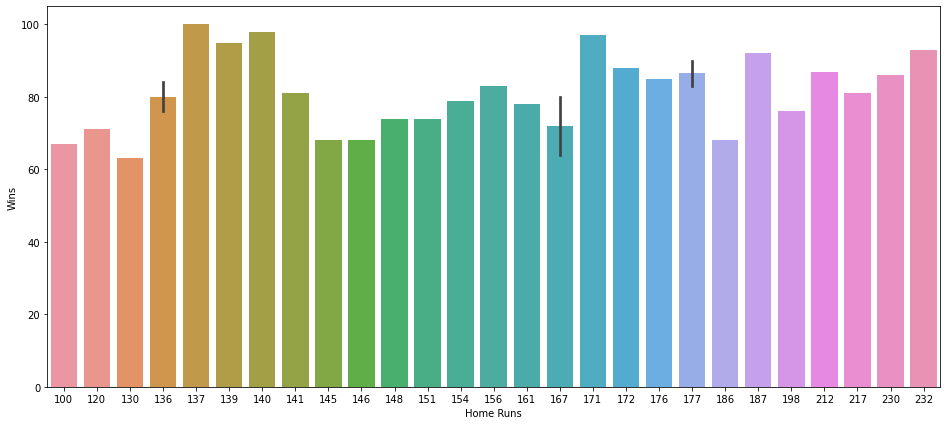

In [32]:
plt.figure(figsize=(16,7))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

Column feature "Home Runs" and it's unique values have no visible pattern when it comes to relating with our target/label "Wins"

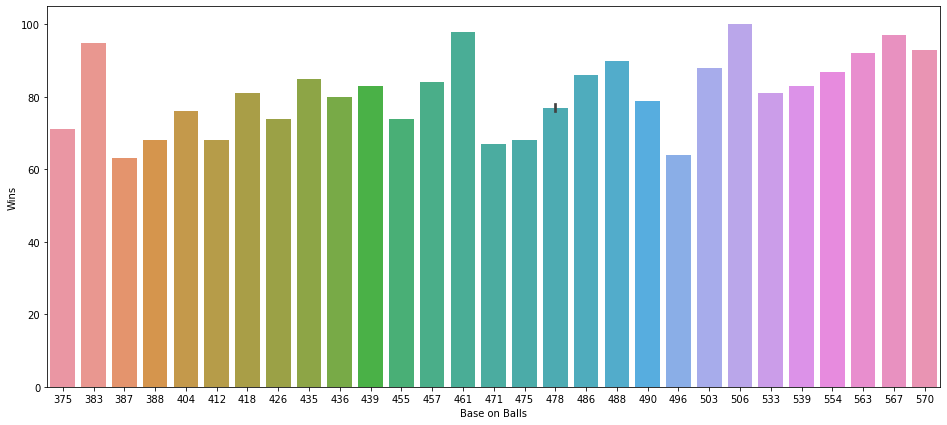

In [33]:
plt.figure(figsize=(16,7))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

Column feature "Base on Balls" and it's unique values are also distributed unevenly when it comes to relating with our target/label "Wins"

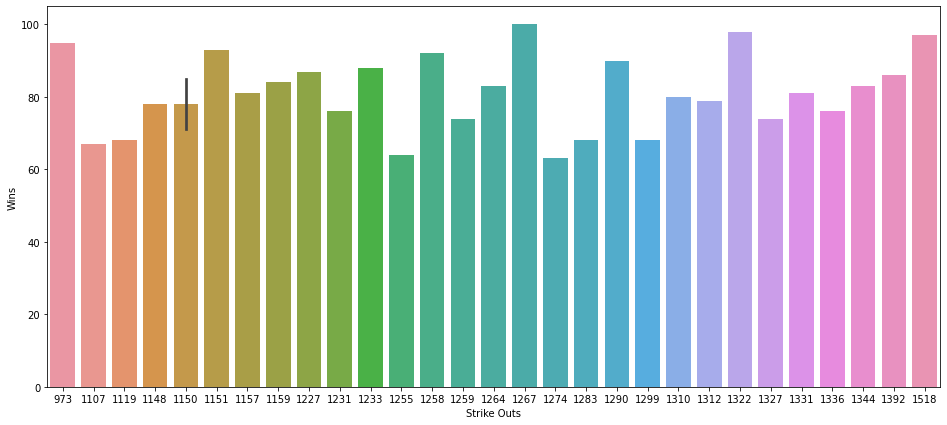

In [34]:
plt.figure(figsize=(16,7))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

Column feature "Strike Outs" and it's unique values are unevenly patterned when it comes to relating with our target/label "Wins"

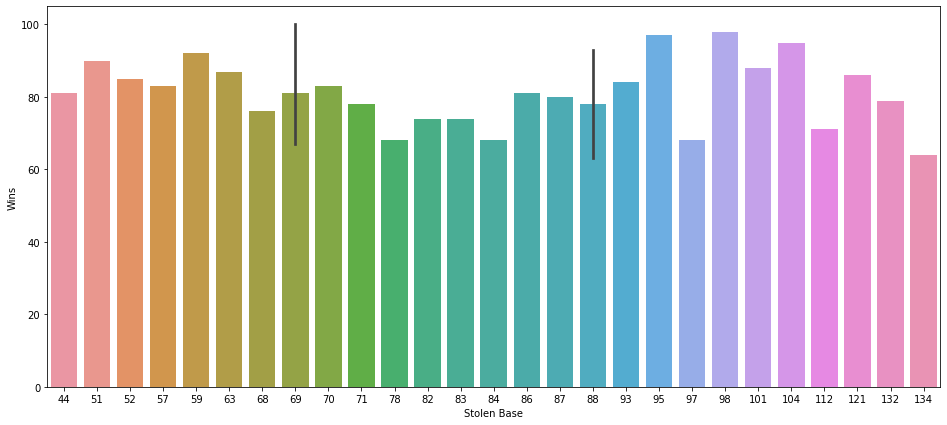

In [35]:
plt.figure(figsize=(16,7))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

Column feature "Stolen Base" and it's unique values are also distributed unevenly when it comes to relating with our target/label "Wins"

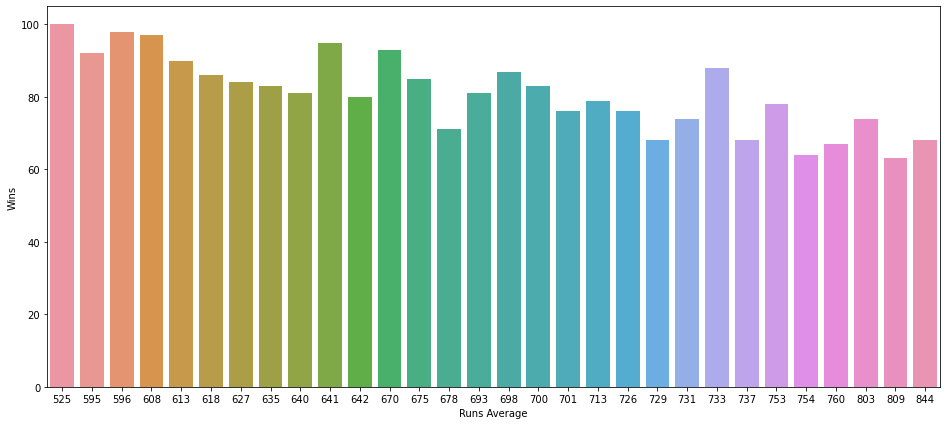

In [36]:
plt.figure(figsize=(16,7))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

Column feature "Runs Average" and it's unique values show a decreasing pattern when it comes to relating with our target/label "Wins"

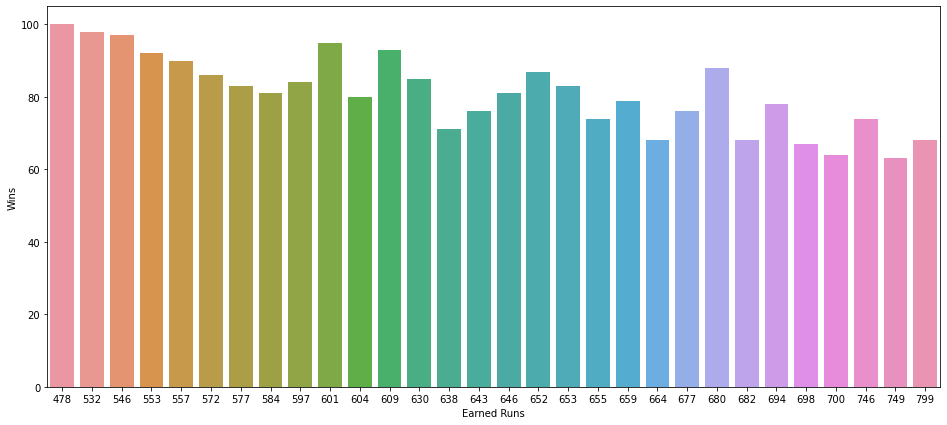

In [37]:
plt.figure(figsize=(16,7))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

Column feature "Earned Runs" and it's unique values also show a decreasing pattern when it comes to relating with our target/label "Wins"

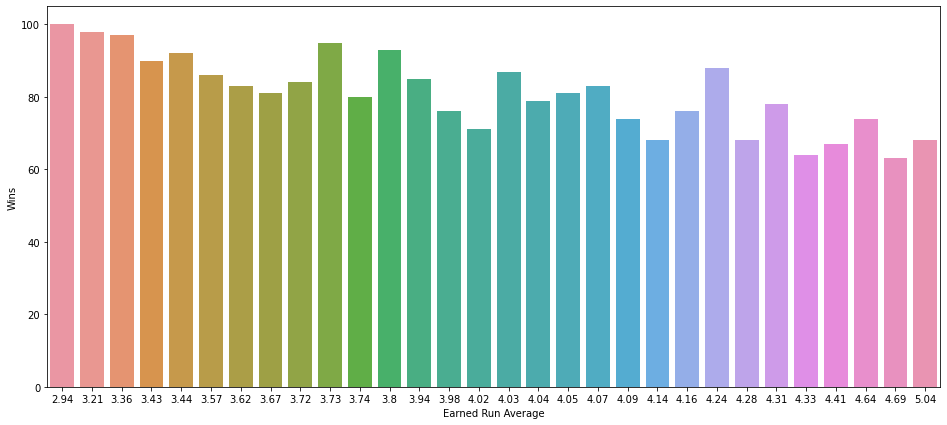

In [38]:
plt.figure(figsize=(16,7))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

Column feature "Earned Run Average" and it's unique values are distributed in a slight decreasing order when it comes to relating with our target/label "Wins"

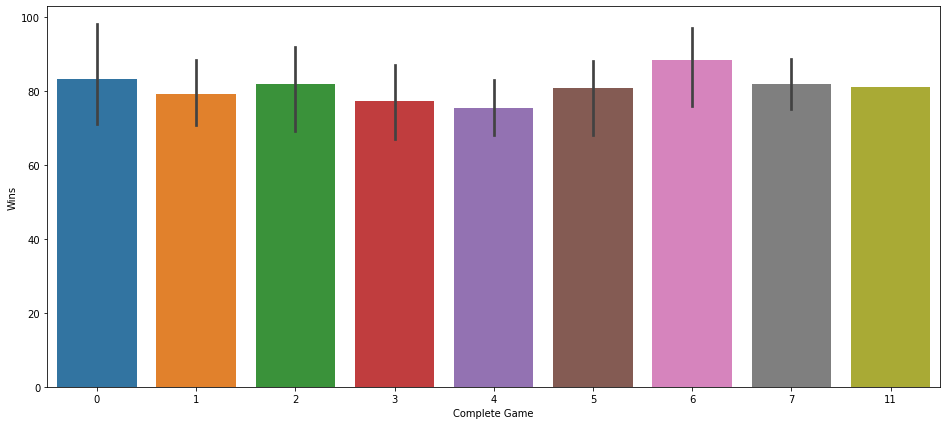

In [39]:
plt.figure(figsize=(16,7))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

Column feature "Complete Game" and it's unique values do not show any pattern when it comes to relating with our target/label "Wins"

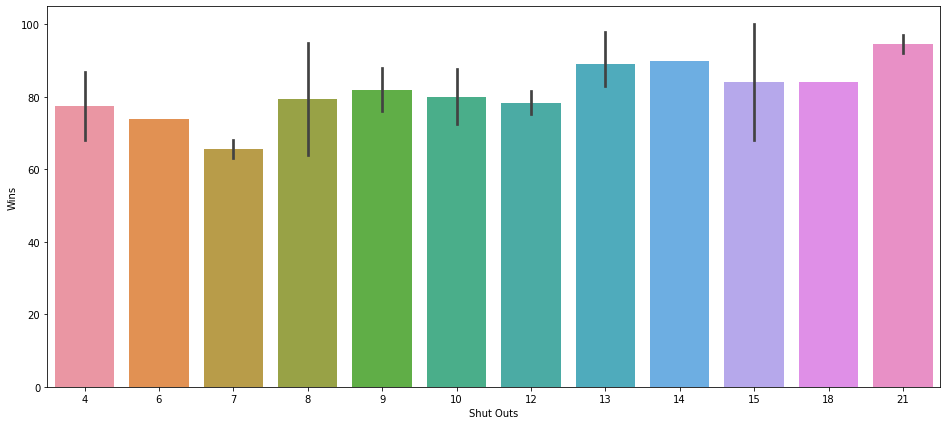

In [40]:
plt.figure(figsize=(16,7))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

Column feature "Shut Outs" and it's unique values are also distributed unevenly when it comes to relating with our target/label "Wins"

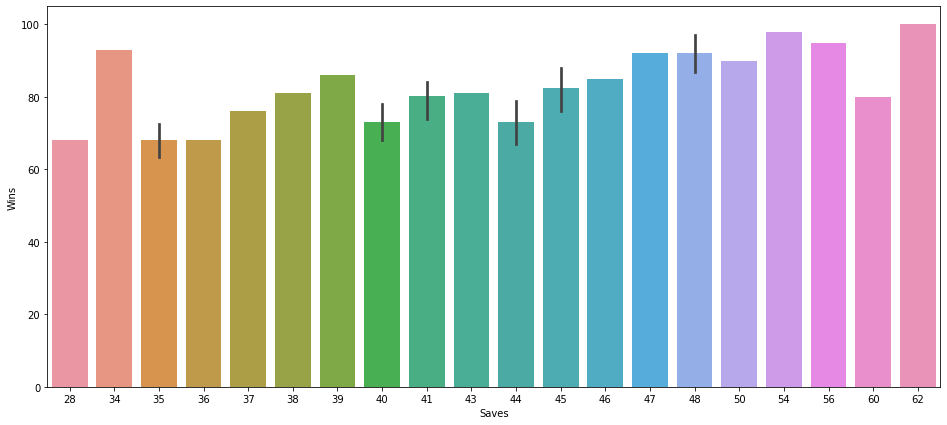

In [41]:
plt.figure(figsize=(16,7))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

Column feature "Saves" and it's unique values show a slightly increasig pattern when it comes to relating with our target/label "Wins"

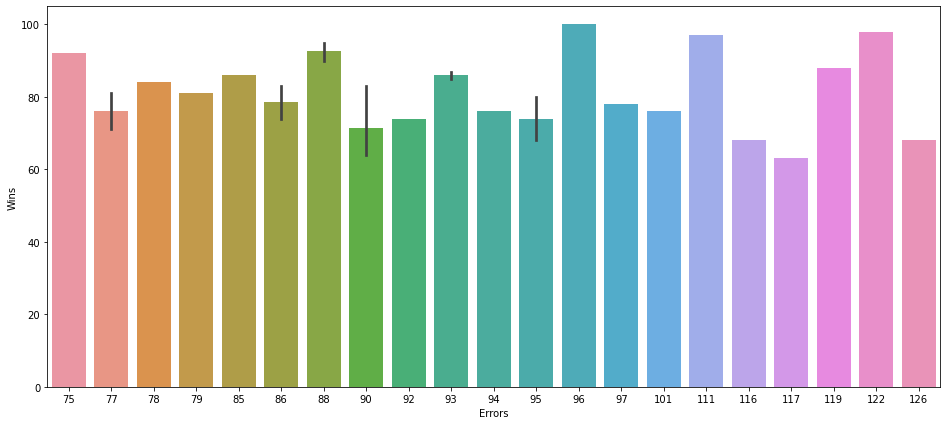

In [42]:
plt.figure(figsize=(16,7))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

Column feature "Errors" and it's unique values are again distributed unevenly when it comes to relating with our target/label "Wins"

# Joint Plot

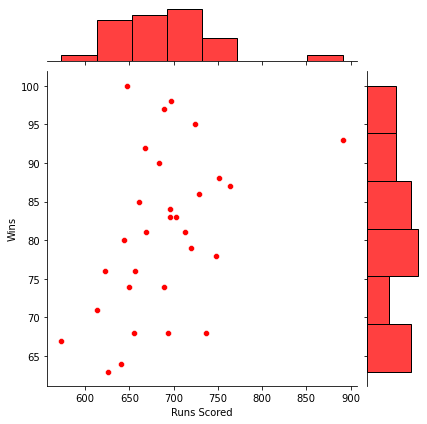

In [43]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="red")

From this joint plot we can say, as runs are getting higher the chances of winning becomes higher.Features are directly proportional to each other.

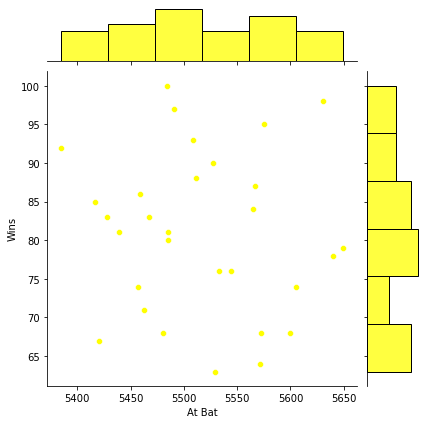

In [44]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="yellow")

From the above plot there is no significant relationship displayed between the Target/label 'Wins' and the feature 'At Bat' and the data points are all over the place, So it doesn't offer anything.

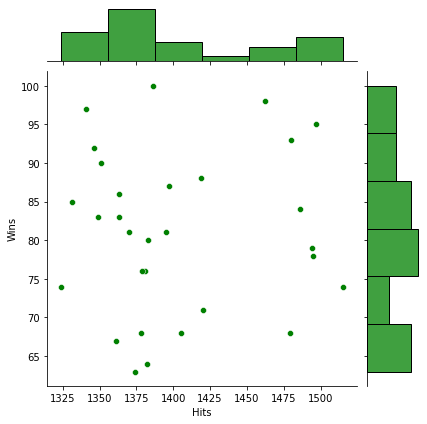

In [45]:
sns.jointplot(x="Hits", y="Wins", data=df, color="green")

Even here we can't say there is any linear relation with our target variable 'Wins' and feature column 'Hits' and the data points are scattered too. (No specific relation)

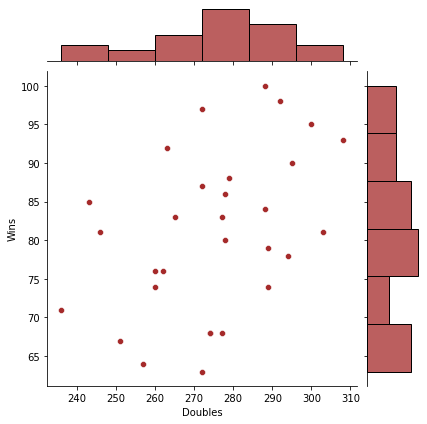

In [46]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="brown")

From above joint plot we can see that if number of doubles are under 250 the chances of win is below 85 and if the number of doubles more than 280 then the chance of wins is more than 85.

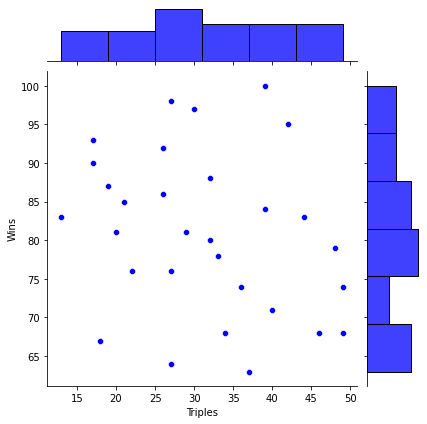

In [47]:
sns.jointplot(x="Triples", y="Wins", data=df, color="blue")

For some reason the data points are scattered showing no relation with the label much and therefore we can say number of 'Triples' feature are not much correlated with label 'Wins'.

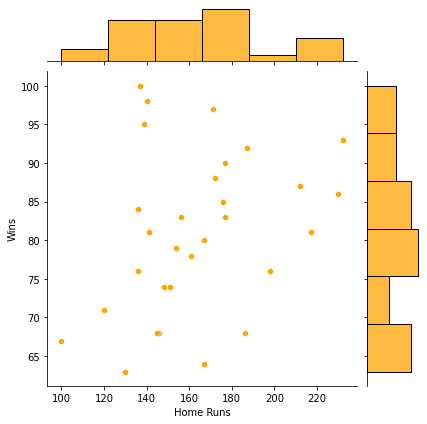

In [48]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="orange")

From the above joint plot we can say if the number of 'Home runs' is below 140, the chances of 'Wins' becoms lower, and after 140 chance of 'Wins' becomes higher.

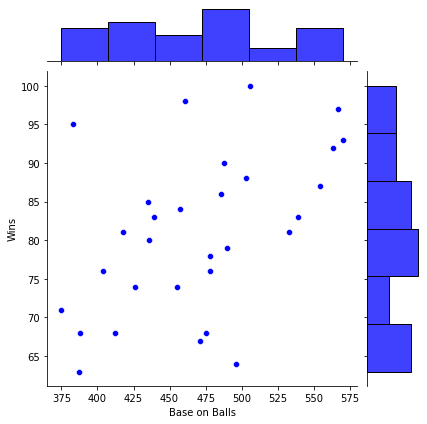

In [49]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="blue")

In case the base on balls number is above 525 then number of wins are more than 80 But still there is not much relation is observed between this feature and the label variables.

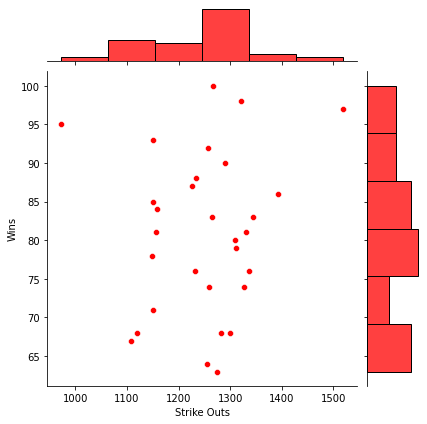

In [50]:
sns.jointplot(x="Strike Outs", y="Wins", data=df, color="red")

In this feature plot of 'strike Outs' it is not showing any linear relation with number of 'Wins'.

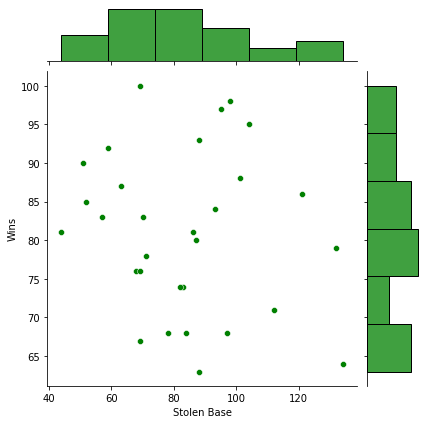

In [51]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="green")

From the plot A 'stolen base' happens when a base runner proceeds by capturing a base to which they are not entitled to and here if stolen base is between 40 to 60 the number of wins are above 80.

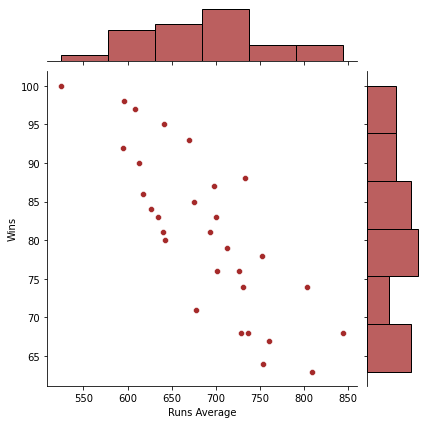

In [52]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="brown")

From the above plot we can say that 'Runs Average' are negatively related to number of 'Wins', that is because as the Runs Average number increases the win possibility decreases So the features are inversely proportional to each other.

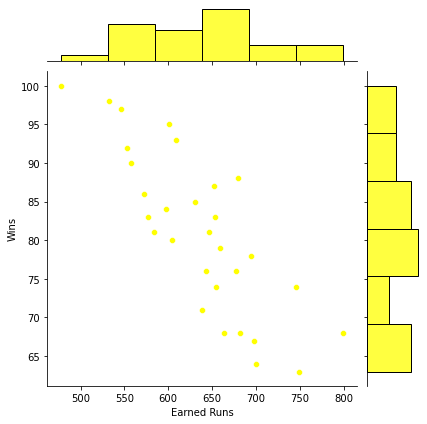

In [53]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="yellow")

Just like the Runs Average number, 'Earned Runs' also negatively impacts to number of 'Wins'. That means features are inversely proportional to each other.

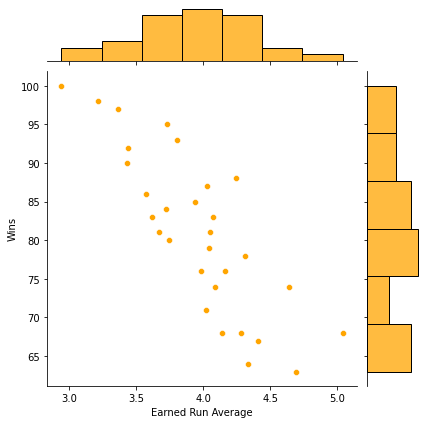

In [54]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="orange")

'Earned Runs Average' is negatively related to number of wins and is completely depends on feature Earned Runs.That means features are inversely proportional to each other.

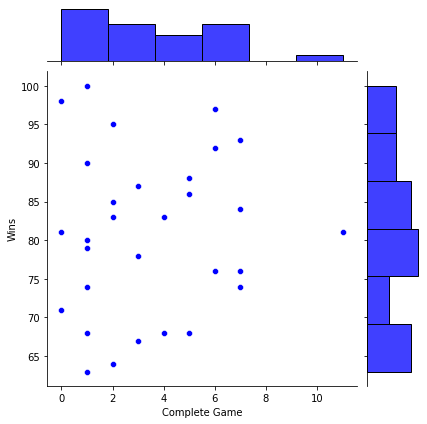

In [55]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="blue")

We can see that as number of 'Complete game' goes above 6 then the number of 'Wins' is more than 75 and there is an outlier data present too.

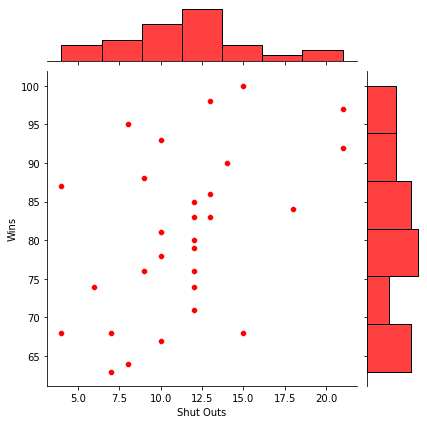

In [56]:
sns.jointplot(x="Shut Outs", y="Wins", data=df, color="red")

A 'Shut outs' refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run so here as the shout outs rise the wins number increases too. That means features are directly proportional to each other.

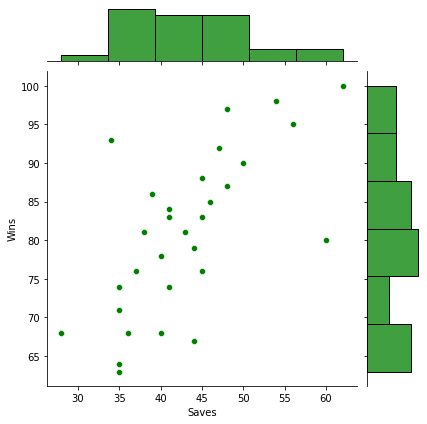

In [57]:
sns.jointplot(x="Saves", y="Wins", data=df, color="green")

A 'Saves' is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances so here as the number of saves goes higher the number of wins also increases.That means features are directly proportional to each other.

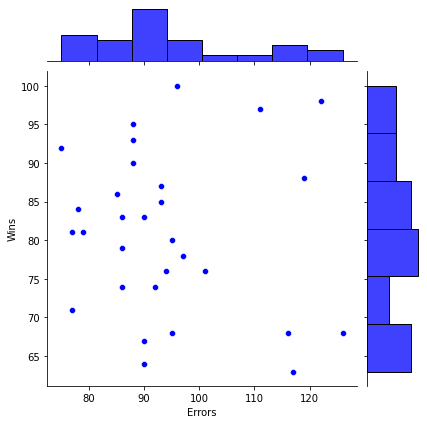

In [58]:
sns.jointplot(x="Errors", y="Wins", data=df, color="blue")

In baseball statistics an 'Error' is an act in the judgment of the official scorer of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. So here the number of errors are more in the range of 70 to 100 impacting the wins.

# LM (Line plot) Plot

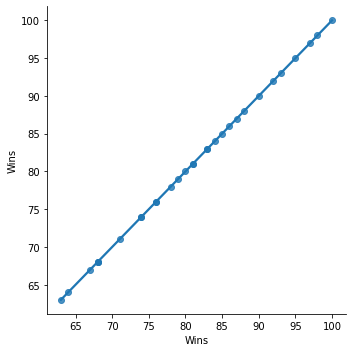

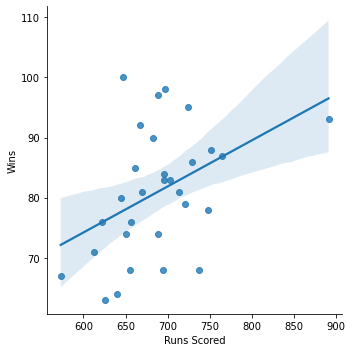

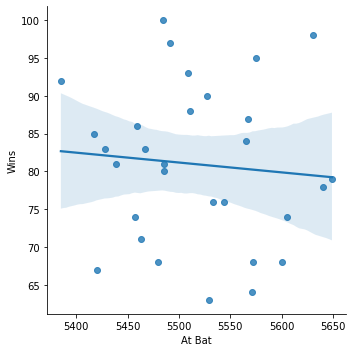

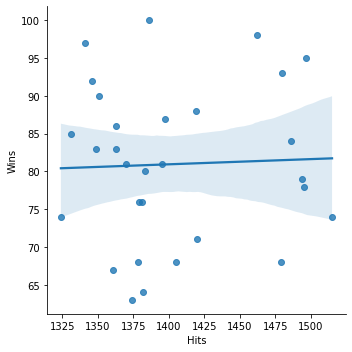

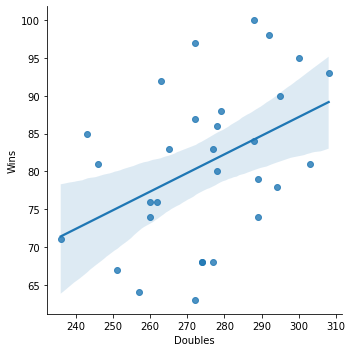

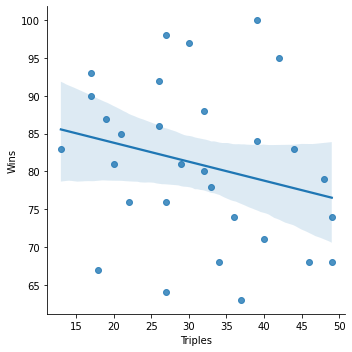

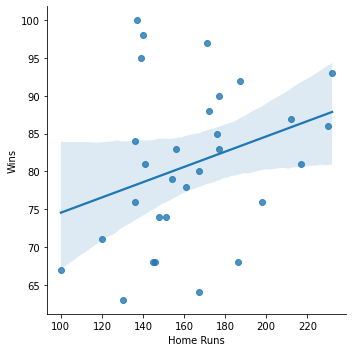

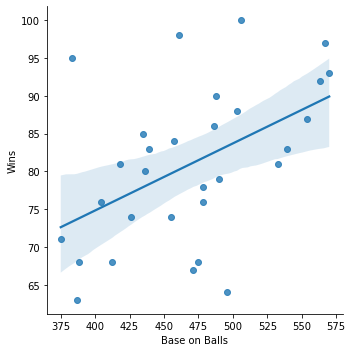

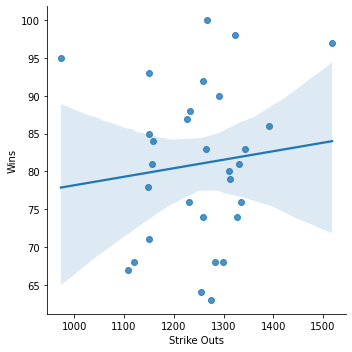

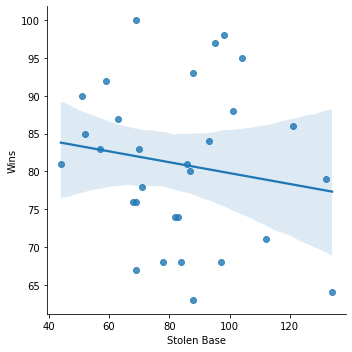

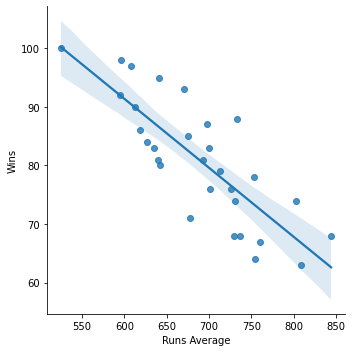

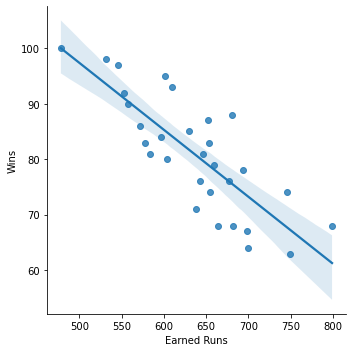

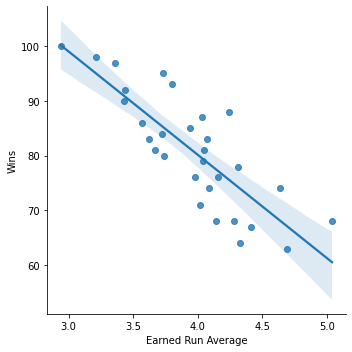

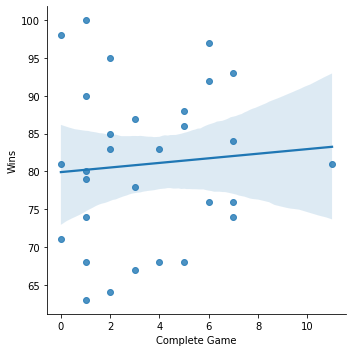

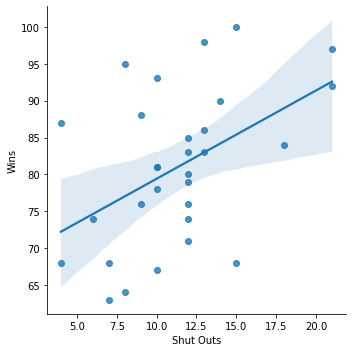

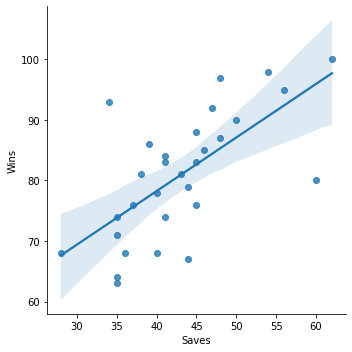

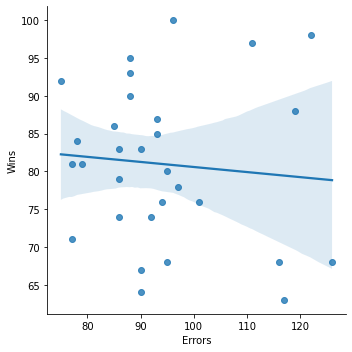

In [59]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

From the above Line plot we can see that: 
1. Runs is directly proportional to wins, 
2. At Bats is inversely proportional to wins, 
3. Hits is not much impacted by Wins, 
4. Doubles is proportional to Wins, 
5. Triples is again proportional to Wins, 
6. Home runs is proportional to Wins, 
7. Walks is also proportional to wins, 
8. Strike out is proportional to wins, 
9. Stolen bases is proportional to Wins, 
10. Runs allowed is inversely proportional to Wins, 
11. Earned runs is again inversely proportional to Wins, 
12. Earned runs average is also inversely proportional to Wins, 
13. Wins is somewhat affected by the number of Complete Games, 
14. Wins is slightly affected by shut outs and Wins is directly propertional to Saves.

# Multivariate Analysis

# Pair Plot

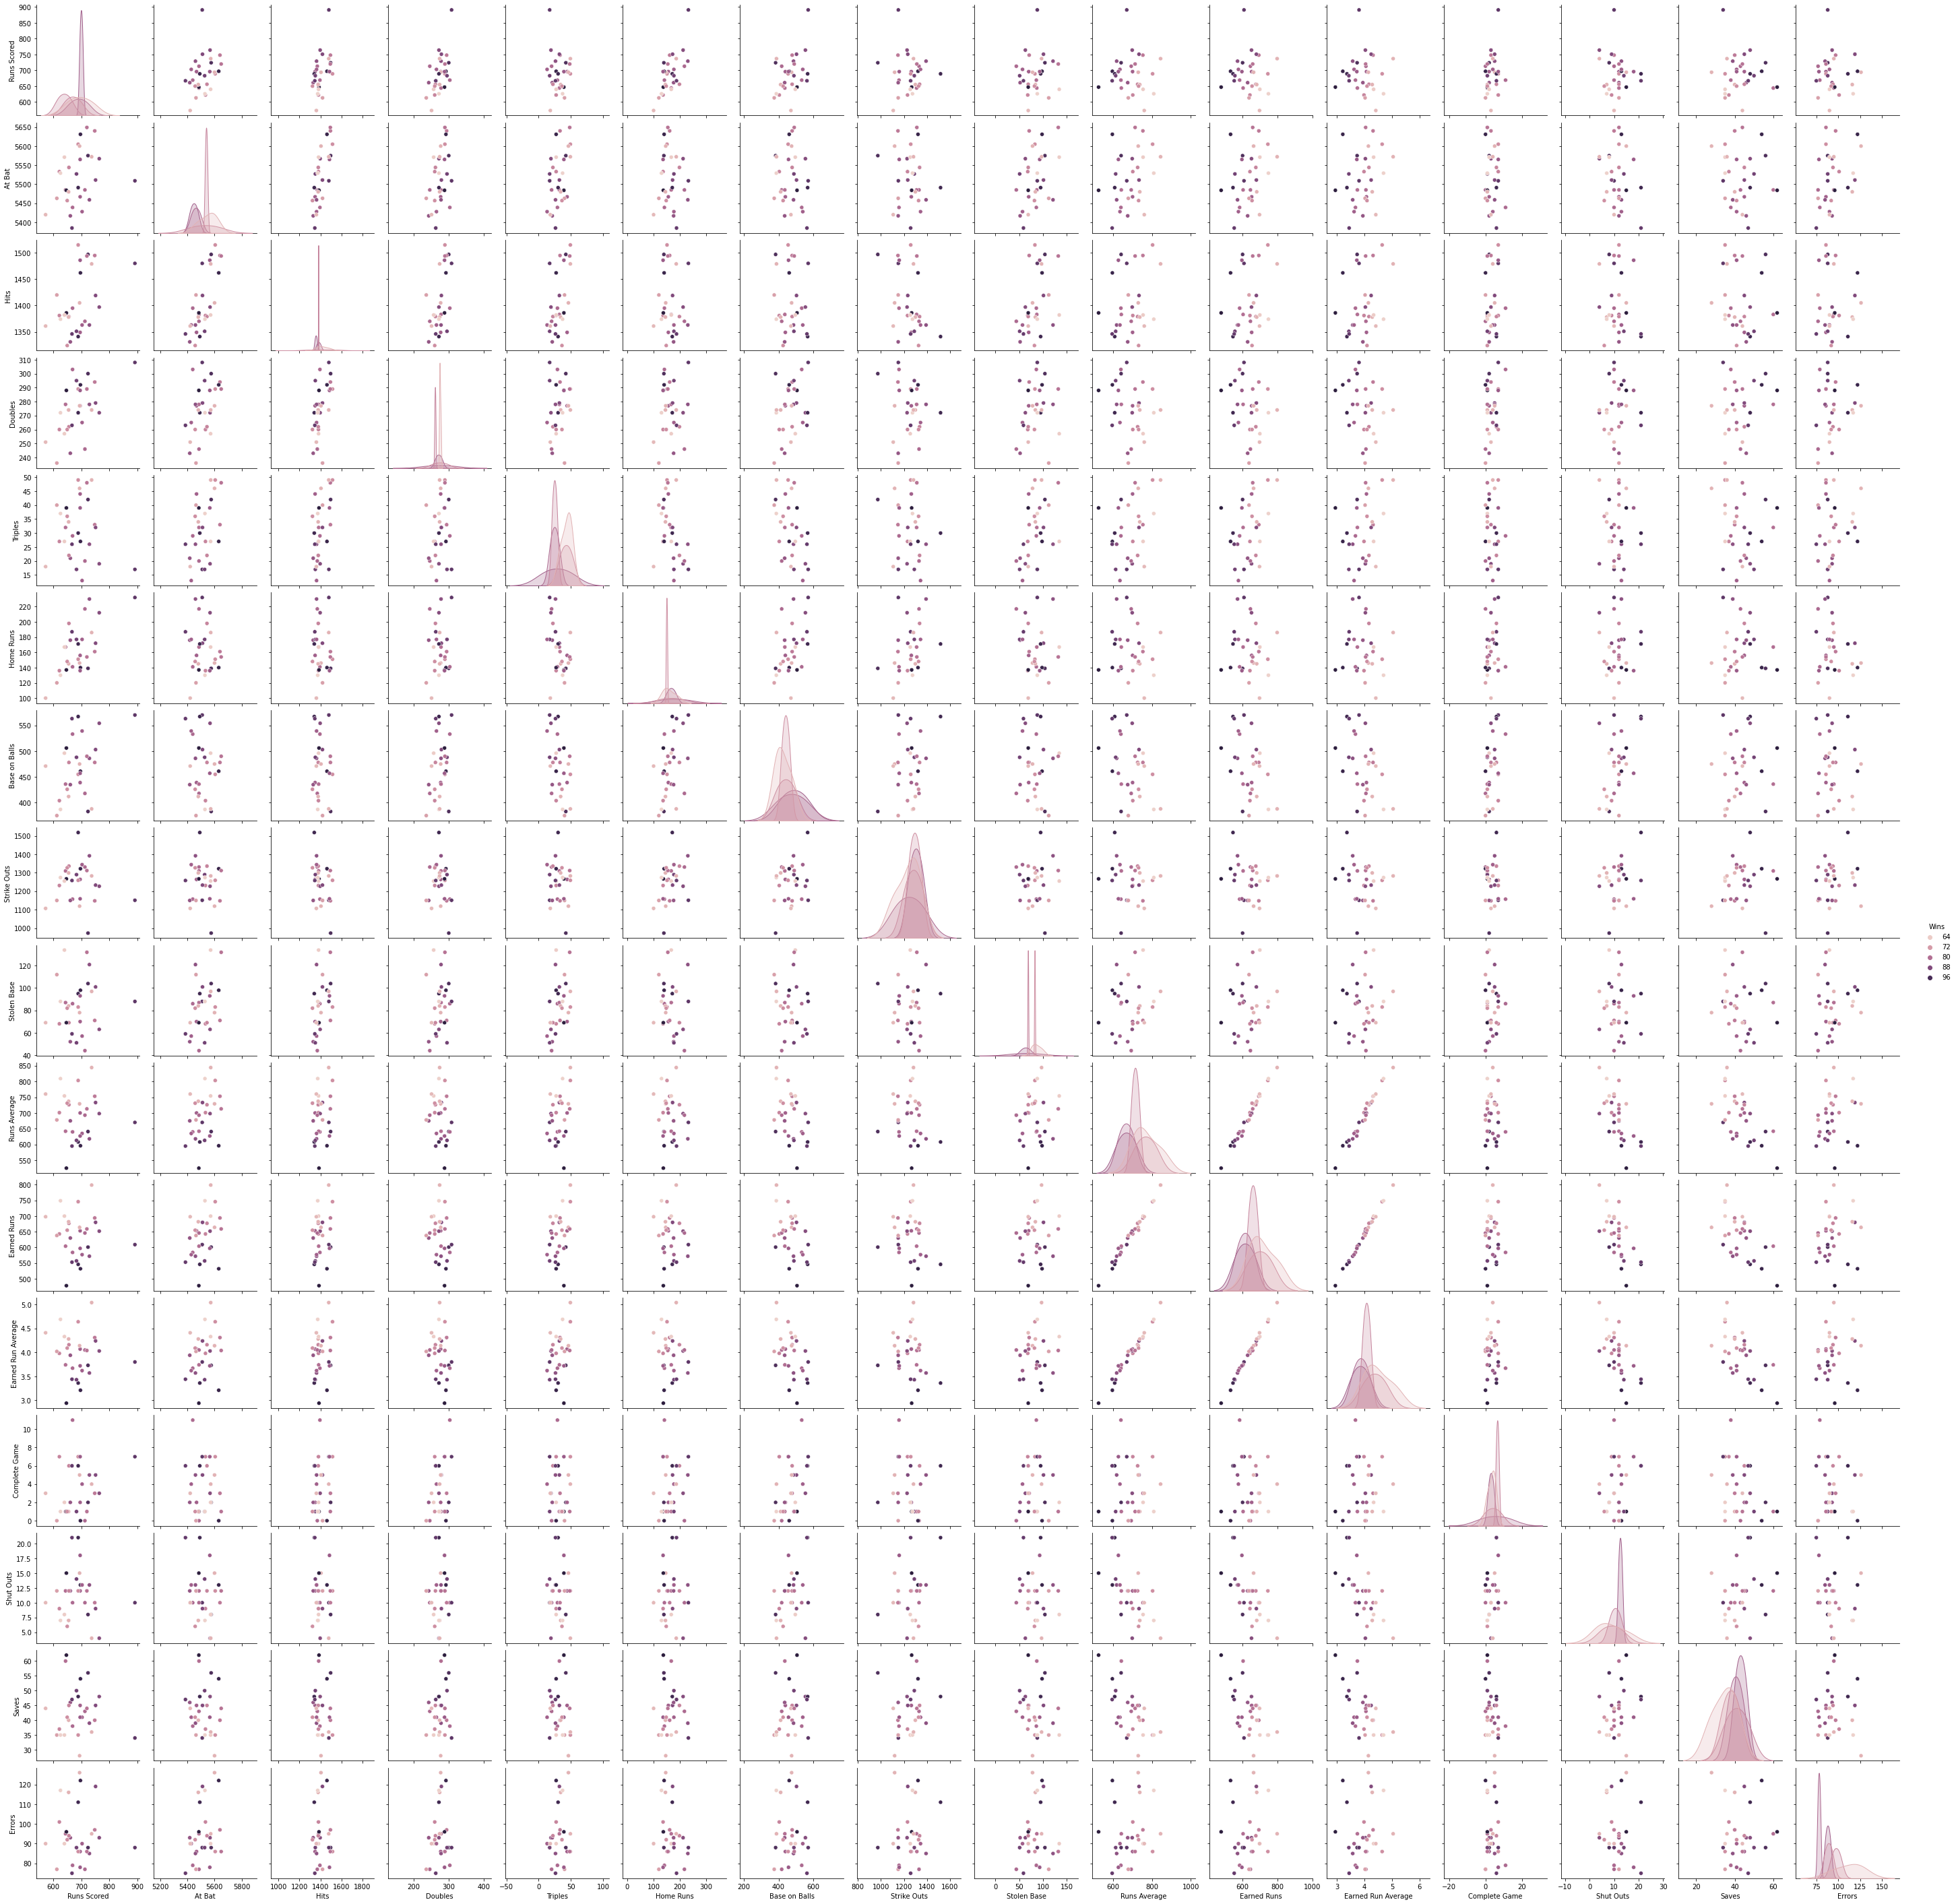

In [60]:
sns.pairplot(df, hue="Wins")

Since there are 17 columns present in our dataset making a pairplot for all of them has given us a very tiny image with an unreadable format therefore we will take help of a heatmap to get the collinearity details for the columns in our dataset.

# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

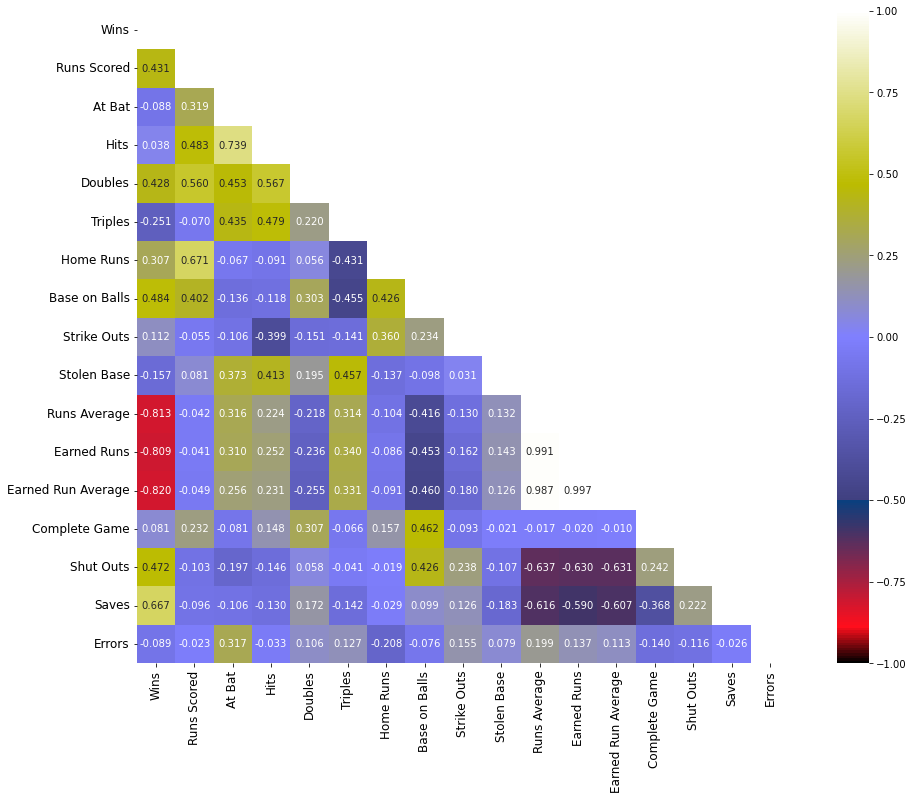

In [61]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs Average", "Earned Runs" and "Earned Run Average".

Also there is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average" data points. We may need to drop highly correlated columns to avoid this issue or I may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.

In [62]:
df = df.drop(["Earned Runs", "Earned Run Average"], axis=1)

Since the feature columns "Earned Runs" and "Earned Run Average" have a high collinearity with the column "Runs Average" where all 3 are negatively correlated with our label column "Wins" therefore dropping the other two to avoid multi collinearity issue in our model.

# Outlier removal using Z Score

In [63]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (30, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


I have used the Z score method to remove any outlier that we could afford to lose from our original dataset. I see that since there were not many data points removed our new dataset would still have outlier traces but I would like to retain them.

# Box Plot

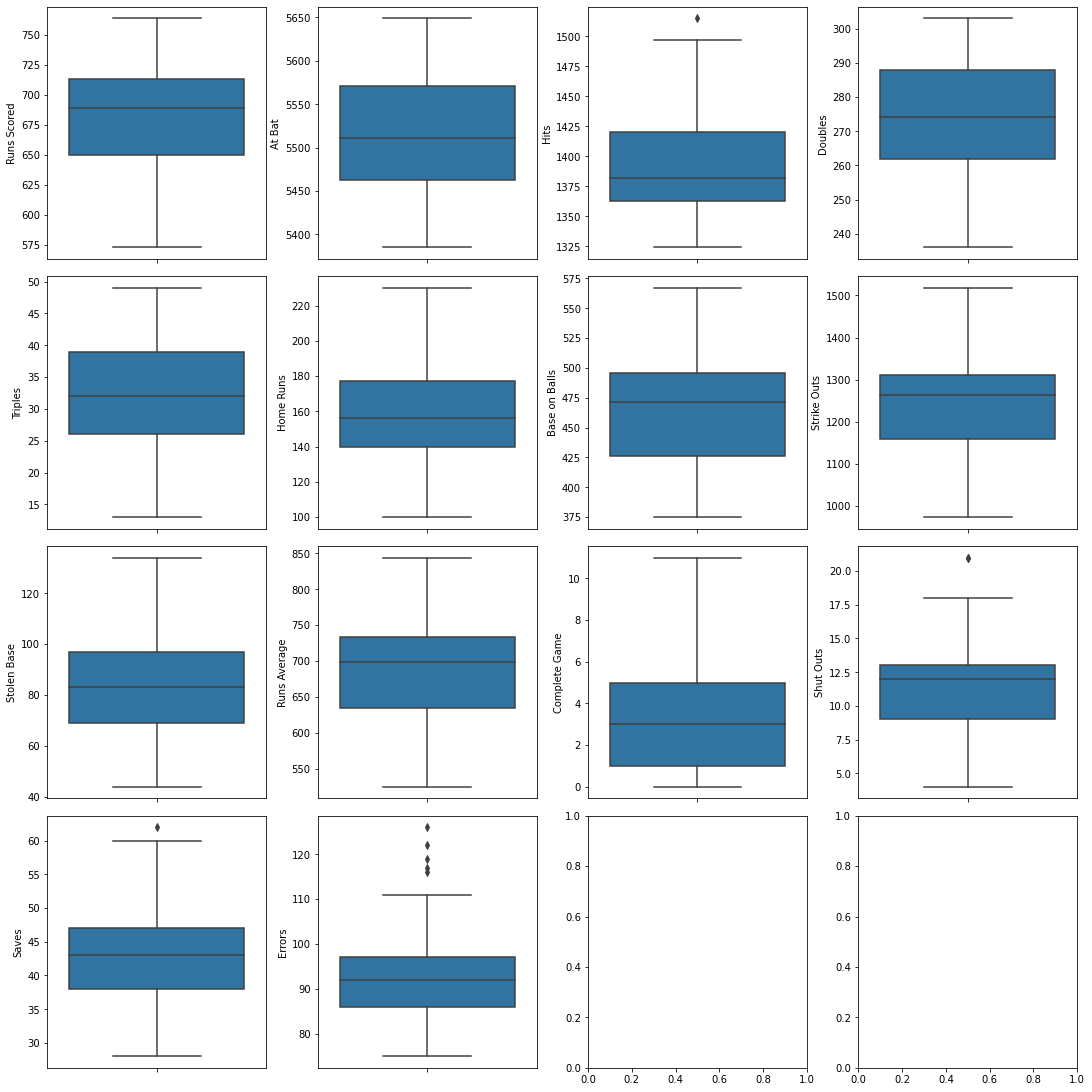

In [64]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

There are light traces of outliers still present in our dataset but I think I will not remove any more information from my now updated dataset. Using the existing data to building the machine learning model.

In [65]:
df.skew()

Wins             0.119013
Runs Scored     -0.215364
At Bat           0.169573
Hits             0.783772
Doubles         -0.335304
Triples          0.090124
Home Runs        0.450862
Base on Balls    0.151193
Strike Outs     -0.233815
Stolen Base      0.494966
Runs Average     0.018155
Complete Game    0.854980
Shut Outs        0.526943
Saves            0.627480
Errors           0.840271
dtype: float64

I can see that there are still few columns showing slight skewness but overall it seems that they are either withing the acceptable range or very near to the acceptable range of skewness that is +/-0.5.

# Distribution Plot

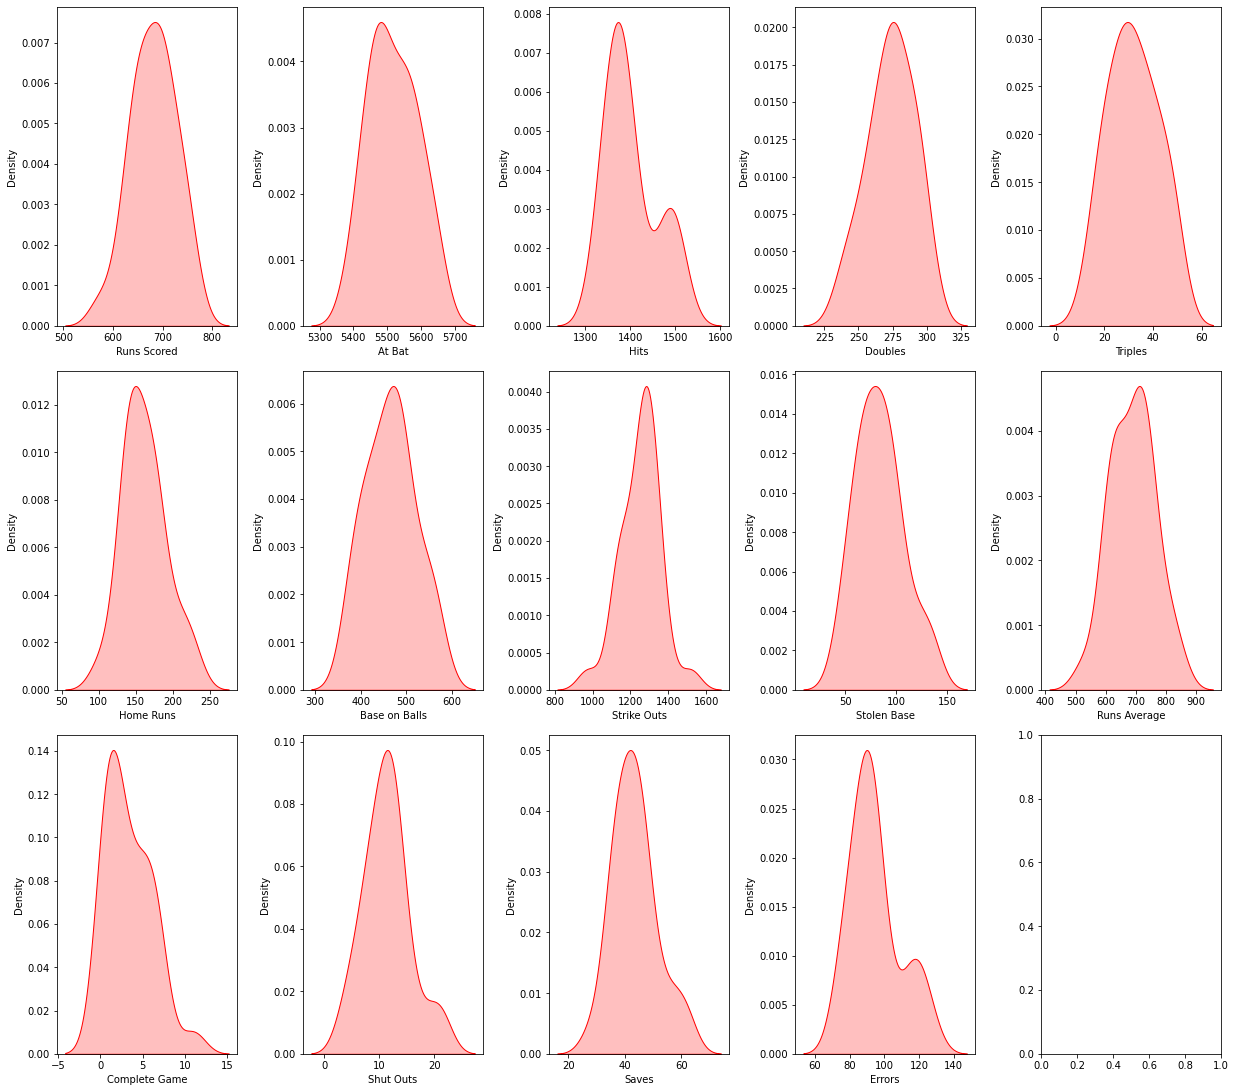

In [66]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

After taking a look at the above distribution plot I can see that almost all of the feature columns are able to show a bell shape curve indicating towards a normalized dataset. So we are good to go.

# Visualizing the correlation between label and features using bar plot

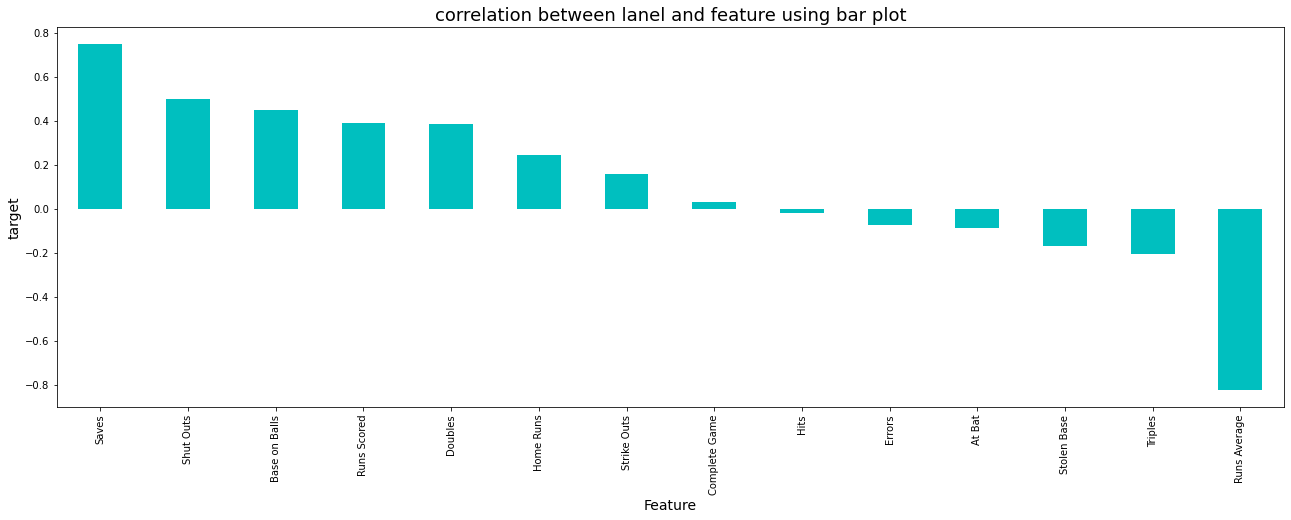

In [68]:
plt.figure(figsize=(22,7))
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Now we can easily analyse the data, here the feature "H" and "CG" has very less correaltion with the label. Let's drop them.

In [69]:
df.drop("Hits", axis=1, inplace=True)

In [70]:
df.drop("Complete Game", axis=1, inplace=True)

In [72]:
df.head()

,Wins,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Shut Outs,Saves,Errors
0,95,724,5575,300,42,139,383,973,104,641,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,12,35,86


# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [73]:
X = df.drop('Wins', axis=1)
Y = df['Wins']

I have divided the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [74]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,-0.570122,0.211006,1.757915


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Principal component analysis (PCA)

In [76]:
pca = PCA(n_components=12, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Shut Outs,Saves,Errors
0,-1.848158,-1.391918,2.234986,-2.779728,-0.062176,-1.049359,0.382183,-0.747614,0.540104,0.102519,0.282565,-0.139078
1,-0.152919,0.100491,0.353879,-0.444281,-0.570551,-0.279360,-1.203958,0.758553,0.539613,-0.296413,-0.152969,-0.160819
2,0.550366,-0.117515,1.092091,-0.877402,-0.863116,1.236942,1.330649,1.466561,0.637121,0.804073,-0.031693,0.269266
3,-0.947945,1.894751,0.148055,0.229715,0.862822,0.139922,-0.180630,-0.261756,-0.632240,0.691314,-0.332871,0.301308
4,-2.115153,-0.820270,-0.158243,0.115836,-0.984273,0.866168,-0.983680,0.978393,-0.796908,-0.316531,0.213320,-0.030600
5,1.075996,-1.338095,-2.480596,-1.872187,0.881793,0.296078,1.097434,-0.117679,-0.073983,-0.759660,-0.533628,0.440364
6,1.586545,1.263190,-2.459268,-1.220308,-0.301934,-0.700874,-1.241440,-0.514451,-0.522125,0.252123,-0.271918,-0.098039
7,1.006375,-0.035584,1.077878,-0.003425,0.592627,-1.908192,-0.154586,0.249233,-0.167223,-0.315273,0.637912,0.074675
8,-1.342468,-1.733403,-0.536249,-1.315372,0.458219,1.341228,-0.129832,-0.113917,-0.561975,-0.023891,-0.021168,-0.309283
9,-0.567805,-1.460646,-0.927447,0.259207,1.028933,0.174023,0.707101,-0.332270,1.420015,-0.543264,0.126914,-0.484776


Used the PCA techniques so that it can help us in reducing the skewness present in our dataset even though ideally PCA is used for reducing dimentionality (curse of dimentionality) on bigger dataset I am using this to check if it can assist with the skewness concern.

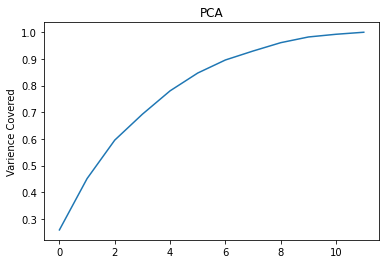

In [77]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

Observation: We can take principal component = 12 which covers maximum variance

# Power Transformation

In [79]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Shut Outs,Saves,Errors
0,-1.071116,-0.951057,1.711388,-2.525831,-0.168733,-1.244281,0.617621,-1.192324,0.886656,0.345029,0.803811,-0.404993
1,-0.018341,0.218840,0.262576,-0.418762,-0.632735,-0.236559,-1.904442,1.183024,0.885884,-0.516116,-0.453053,-0.484920
2,0.374402,0.071027,0.828664,-0.814057,-0.879338,1.326485,1.567756,2.206531,1.038630,1.458553,-0.109340,0.921928
3,-0.497351,1.211041,0.105557,0.203389,0.834552,0.247770,-0.112563,-0.389288,-1.036054,1.302602,-0.954918,1.013932
4,-1.246195,-0.463657,-0.127239,0.097543,-0.978082,0.983711,-1.473919,1.505242,-1.318715,-0.565101,0.599963,-0.020664
5,0.652449,-0.903444,-1.869463,-1.713202,0.857039,0.415214,1.355475,-0.157506,-0.098814,-1.770873,-1.505239,1.397416
6,0.913936,0.892990,-1.853581,-1.125202,-0.394169,-0.771716,-1.979922,-0.803161,-0.848471,0.616429,-0.785870,-0.256741
7,0.616192,0.127715,0.817729,-0.012987,0.521788,-2.504384,-0.074514,0.416934,-0.252768,-0.562023,1.870011,0.328909
8,-0.745381,-1.260761,-0.413166,-1.211217,0.371745,1.419889,-0.038745,-0.151498,-0.916219,0.095270,-0.079285,-1.055867
9,-0.264374,-1.012344,-0.707844,0.230846,1.033664,0.284866,0.971883,-0.503881,2.238653,-1.152276,0.347606,-1.785474


Using the 'yeo-johnson' method as 'box-cox' can be used only on positive data. With the help of Power Transformation our outliers should be handled too. Since we do not have much data I am trying not to lose any rows by removing outliers right now. However if needed to increase the accuracy of our model I may perform outlier removal later on.

# Variance Inflation Factor(VIF)

In [80]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.005924
1,At Bat,1.021124
2,Doubles,1.004674
3,Triples,1.001865
4,Home Runs,1.010164
5,Base on Balls,1.010106
6,Strike Outs,1.016209
7,Stolen Base,1.004243
8,Runs Average,1.002458
9,Shut Outs,1.010497


In theory if a VIF is above 10 it indicates high correlation and is cause for concern. Right now we have almost all the feature columns within the range of intended VIF value. This definitely gives us a green signal on creating our machine learning model.

In [81]:
X.skew()

Runs Scored      0.024217
At Bat           0.052529
Doubles          0.020150
Triples          0.096612
Home Runs        0.021231
Base on Balls   -0.024434
Strike Outs     -0.005370
Stolen Base      0.024480
Runs Average     0.052033
Shut Outs        0.078457
Saves            0.003154
Errors           0.012371
dtype: float64

Once again I am taking a look at the skewness details for our feature columns and even though I see the values out of range they do not seem to have any kind of abnormality that means No skewness present in X dataset and we will confirm the same using a distribution plot and visualize it.

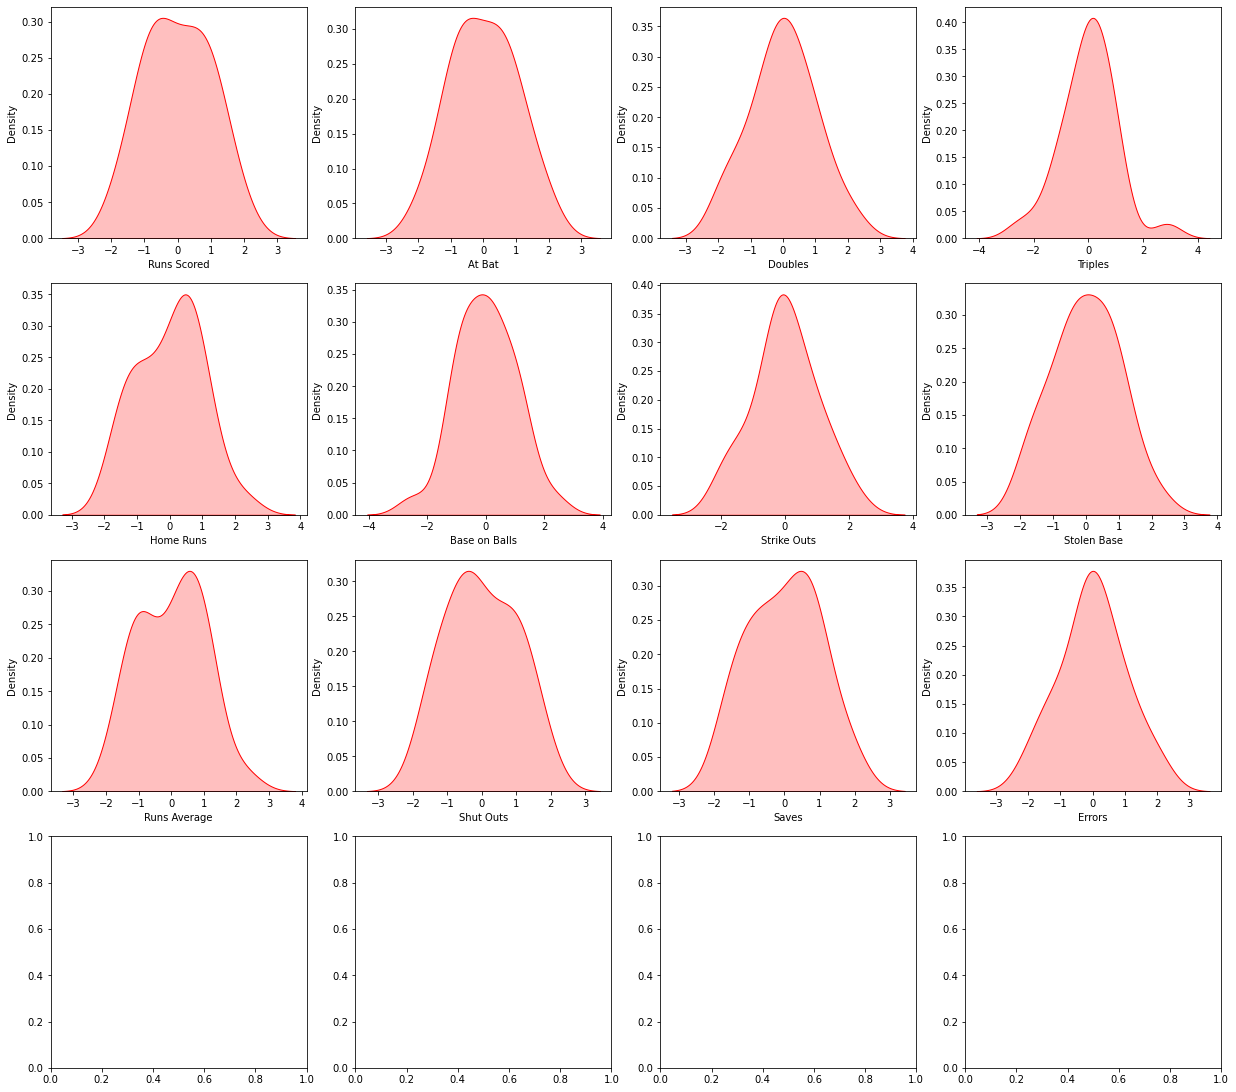

In [82]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in X.items():
    sns.distplot(value, ax=ax[index], hist=False, color="red", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

As we can see in the above distribution plot all the values are being reflected in proper normalized formated showing a bell shape curve format. So we are good to go with the dataset for the next step  to find the best model.

# Finding best random state for building Regression Models

In [83]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9808209284668195 on Random State 297


Great so with the help of random state selection process we have found our lucky number to be 297 amongst 1-1000

# Creating the training and testing data sets

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=297)

I am taking 22 percent of the complete dataset for training purpose and the remaing 78 percent with be used to train the machine learning models

# Machine Learning Model for Regression with Evaluation Metrics

In [86]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=297)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Mean Squared Error(MSE)
    MSE = mean_squared_error(Y_test,pred)
    print('MSE Score is:  ',MSE)
    
    # RMSE - a lower RMSE score is better than a higher one
    RMSE =np.sqrt(mean_squared_error(Y_test,pred,squared=False))
    print("RMSE Score is:", RMSE)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    
    #Result of mean_absolute_error
    MAE = mean_absolute_error(Y_test,pred)
    print('MAE Score is:  ',MAE)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the MSE score, RMSE score, generates the R2 score, calculates the Cross Validation score, MAE score and finally finds the difference between the R2 score and Cross Validation score.

In [87]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

MSE Score is:   3.2377404024993703
RMSE Score is: 1.3414068080022639
R2 Score is: 98.08209284668195
Cross Validation Score: -0.025941154111928096
R2 Score - Cross Validation Score is 98.10803400079388
MAE Score is:   1.534305866630579


Created the Linear Regression model and checked it's evaluation metrics.

In [88]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

MSE Score is:   3.0224386261755987
RMSE Score is: 1.3185280482236472
R2 Score is: 98.20962895693177
Cross Validation Score: 2.212099989466898
R2 Score - Cross Validation Score is 95.99752896746487
MAE Score is:   1.4959725492694145


Created the Ridge Regression model and checked it's evaluation metrics.

In [89]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1000)
reg(model, X, Y)

MSE Score is:   2.5231072695727006
RMSE Score is: 1.2603289979415924
R2 Score is: 98.50541276343012
Cross Validation Score: 1.3978415362333418
R2 Score - Cross Validation Score is 97.10757122719677
MAE Score is:   1.3349720649732473


Created the Lasso Regression model and checked it's evaluation metrics.

In [90]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

MSE Score is:   169.7556770300745
RMSE Score is: 3.609575055791558
R2 Score is: -0.5564334438303842
Cross Validation Score: -47.93264509538865
R2 Score - Cross Validation Score is 47.376211651558265
MAE Score is:   11.152019702527628


Created the Support Vector Regression model and checked it's evaluation metrics.

In [91]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

MSE Score is:   71.28571428571429
RMSE Score is: 2.905699016542413
R2 Score is: 57.773210831721464
Cross Validation Score: -147.34593183009744
R2 Score - Cross Validation Score is 205.1191426618189
MAE Score is:   8.142857142857142


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [92]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

MSE Score is:   130.93423120421875
RMSE Score is: 3.382698576339759
R2 Score is: 22.439829194793056
Cross Validation Score: -12.007394691711886
R2 Score - Cross Validation Score is 34.44722388650494
MAE Score is:   9.99400720043262


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [93]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

MSE Score is:   137.1013453380149
RMSE Score is: 3.4218457546559606
R2 Score is: 18.78667889793606
Cross Validation Score: -27.140492526778527
R2 Score - Cross Validation Score is 45.92717142471459
MAE Score is:   10.207011852293368


Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [94]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

MSE Score is:   131.06227553682177
RMSE Score is: 3.383525282670422
R2 Score is: 22.363980883652477
Cross Validation Score: -164.4968470729073
R2 Score - Cross Validation Score is 186.86082795655977
MAE Score is:   9.252564401038077


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [95]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

MSE Score is:   93.5716765873016
RMSE Score is: 3.1101841426136767
R2 Score is: 44.57190337551043
Cross Validation Score: -19.239484047165973
R2 Score - Cross Validation Score is 63.811387422676404
MAE Score is:   8.327380952380953


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [96]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

MSE Score is:   107.6716964285714
RMSE Score is: 3.221257100915605
R2 Score is: 36.21961889506772
Cross Validation Score: 1.7014031592002856
R2 Score - Cross Validation Score is 34.518215735867436
MAE Score is:   9.135


Created the Extra Trees Regressor model and checked it's evaluation metrics.

In [97]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

MSE Score is:   141.35830802647564
RMSE Score is: 3.4481038272923366
R2 Score is: 16.265025467875905
Cross Validation Score: -35.859363555291594
R2 Score - Cross Validation Score is 52.124389023167495
MAE Score is:   10.471279689243861


Created the XGB Regressor model and checked it's evaluation metrics.

# Hyper parameter tuning on the best ML Model

In [98]:
# Choosing Ridge Regression

fmod_param ={'alpha':[.0001,.001,.01,.1,1]}

After comparing all the regression models I have selected Ridge Regression as my best model and have listed down it's parameters above referring the sklearn webpage.

In [99]:
rd=Ridge()

In [100]:
GSCV=GridSearchCV(estimator=rd,param_grid=fmod_param)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [101]:
GSCV.fit(X_train,Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [102]:
GSCV.best_params_

{'alpha': 1}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [103]:
Final_Model = Ridge(alpha=1.0,fit_intercept=True, normalize=False, copy_X=True, max_iter=None, positive=False)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 97.38643870238477


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Saving the best model

In [104]:
filename = "FinalModel_bb.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_bb.pkl']

Finally, I am saving my best regression model using the joblib library.

In [109]:
Report=pd.DataFrame({'Actual':Y_test,'Predicted':pred})

In [110]:
Report

,Actual,Predicted
29,68,97.982645
2,81,69.686753
15,100,66.738996
20,90,58.898033
24,63,67.866822
1,83,89.098684
19,64,72.415738


Both original and predicted values are almost close.

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

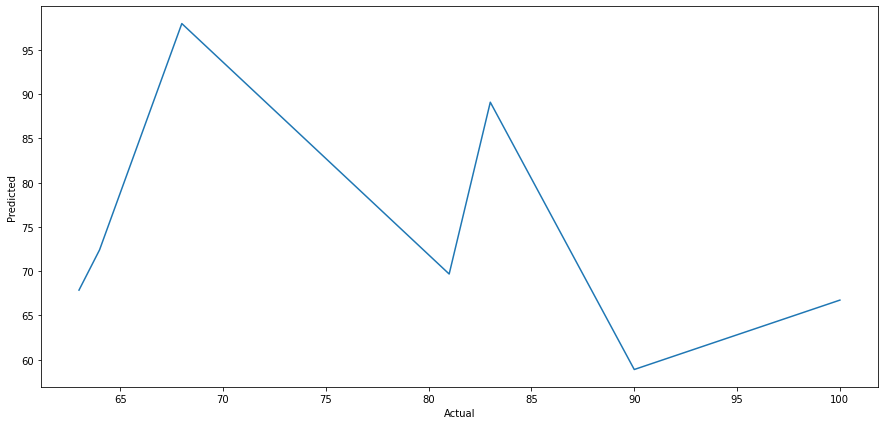

In [107]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Actual',y='Predicted',data=Report)

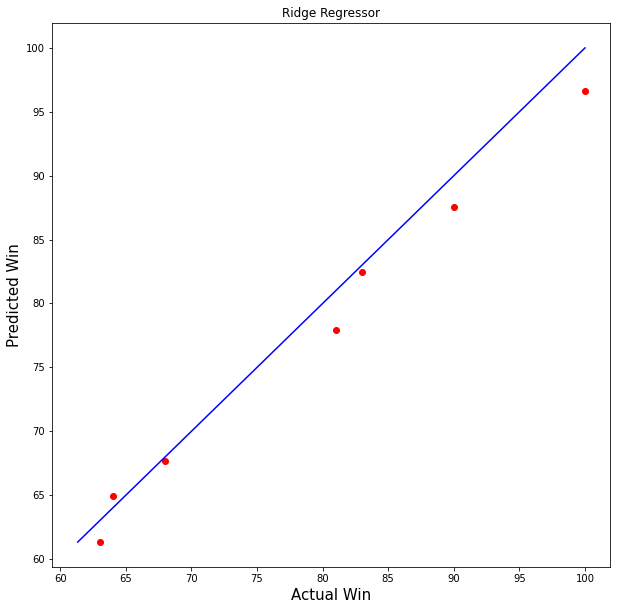

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,fmod_pred, c='r')
plt1 = max(max(fmod_pred), max(Y_test))
plt2 = min(min(fmod_pred), min(Y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.title("Ridge Regressor")
plt.show()

Plotting Actual win vs Predicted win. Here the blue line represents the actual win and red dots are the predicted win.